https://www.kaggle.com/ash316/novice-to-grandmaster

![host-home-recruiting](dat/host-home-recruiting.png)

Kaggle is the world's largest Data Science platform with more than 1 million users, and it is an excellent platform for students like me to learn and grow in the field of Data Science and Machine Learning. It has users from various domains,like statisticians,Data Scientists and Machine Learning Practitioners.This dataset published by Kaggle is a gem for people like me, who like to analyse and investigate data. In this notebook, we will try to find some trending or some common questions, each budding data scientist would like to know, like the most used tools, the resources to learn data science ,etc.

The biggest problem that we might face is fake and bogus responses. As it is a survey, not everyone will answer with proper credentials, and thus I assume that there will be a lot many outlier. Let's dive in straight into the pool of data and gain some insights..

# Introduction

## Who are Data Scientists
A data scientist is a statistician or a programmer, who cleans, manages and organizes data, perform descriptive statistics and analysis to develop insights,build predictive models and solve business related problems. Let's see what do Data Scientists on kaggle say..

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
#plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
from scipy.misc import imread
import codecs
from IPython.display import HTML
#from matplotlib_venn import venn2
from subprocess import check_output
print(check_output(["ls", "dat/"]))

b'RespondentTypeREADME.txt\nconversionRates.csv\nfreeformResponses.csv\nkaggle-Copy1.png\nkaggle.png\nmultipleChoiceResponses.csv\npn_ja.dic\nschema.csv\n'


In [2]:
response=pd.read_csv('dat/multipleChoiceResponses.csv',encoding='utf-8')

In [3]:
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Some Basic Analysis

In [4]:
print('The total number of respondents:',response.shape[0])
print('Total number of Countries with respondents:',response['Country'].nunique())
print('Country with highest respondents:',response['Country'].value_counts().index[0],'with',response['Country'].value_counts().values[0],'respondents')
print('Youngest respondent:',response['Age'].min(),' and Oldest respondent:',response['Age'].max())

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States with 4197 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


Seriously?? Youngest Rspondent is not even a year old. LOL!! And how come grandpa is still coding at the age of 100. It may be a fake response.

## Gender Split

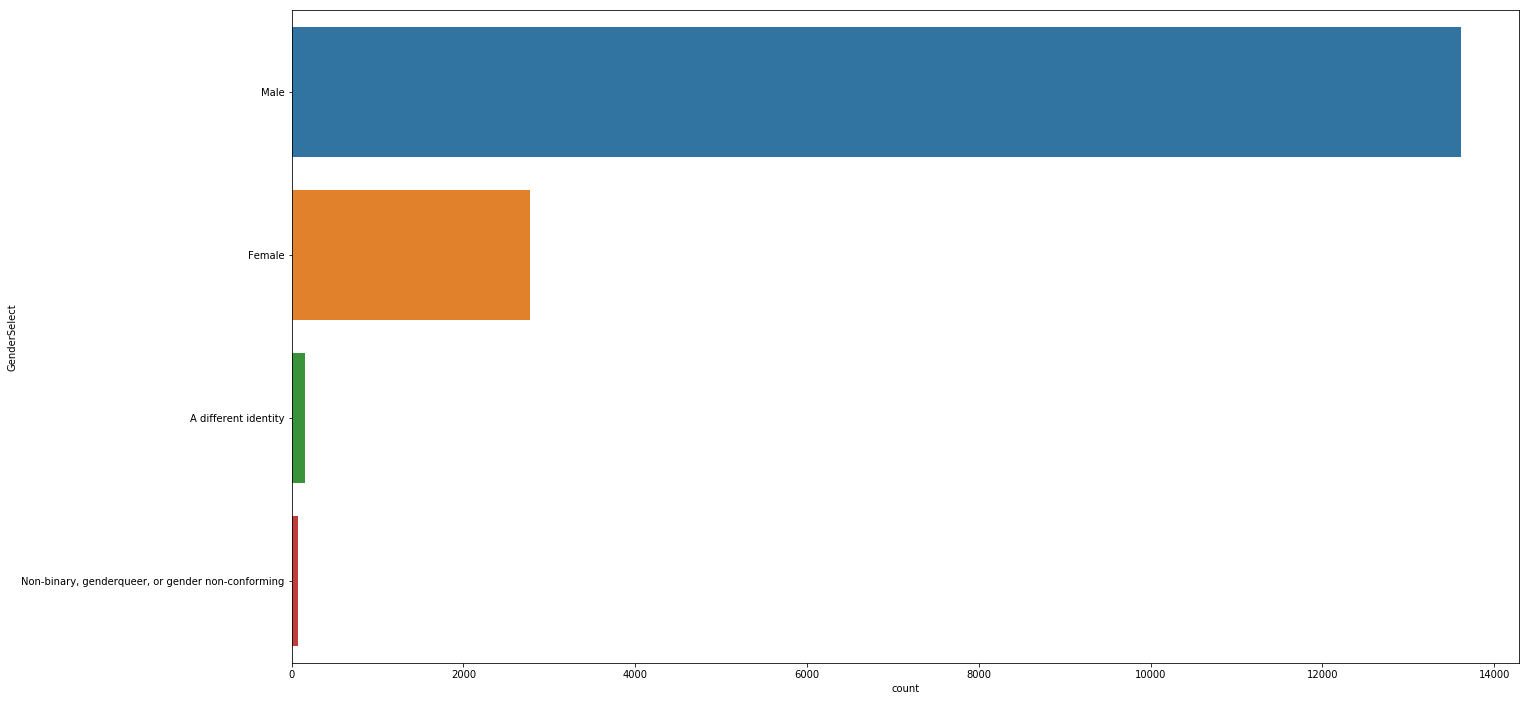

In [5]:
plt.subplots(figsize=(22,12))
sns.countplot(y=response['GenderSelect'],order=response['GenderSelect'].value_counts().index)
plt.show()

The graph clearly shows that there are a lot more male respondents as compared to female. It seems that Ladies were either busy with their coding, or ladies don't code...:p. Just Kidding.

## Respondents By Country

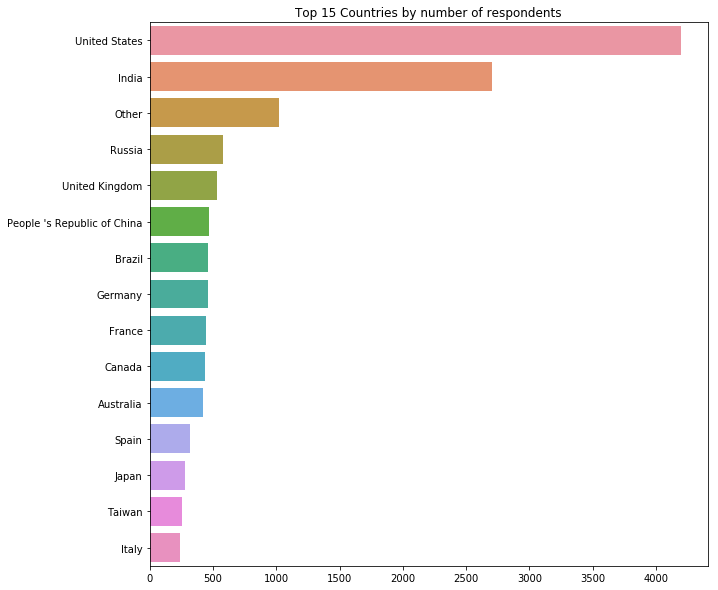

In [6]:
resp_coun=response['Country'].value_counts()[:15].to_frame()
#sns.barplot(resp_coun['Country'], resp_coun.index, palette='inferno')
sns.barplot(resp_coun['Country'], resp_coun.index)
plt.title('Top 15 Countries by number of respondents')
plt.xlabel('')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

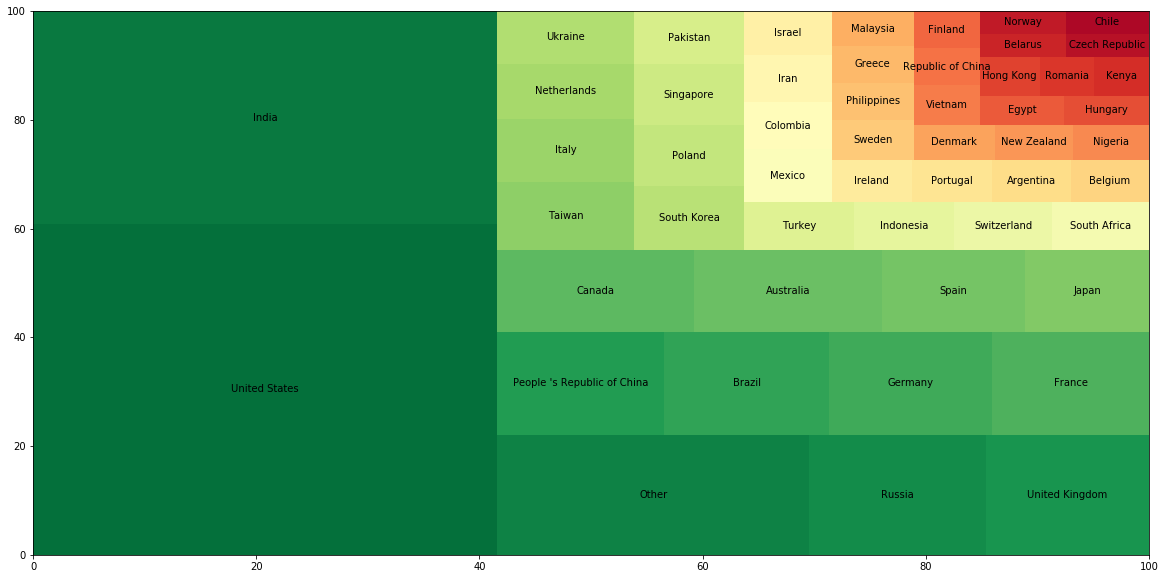

In [7]:
tree=response['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values,label=tree.index,color=sns.color_palette('RdYlGn_r',52))
plt.rcParams.update({'font.size':10})
fig=plt.gcf()
#fig.set_size_inches(40,15)
fig.set_size_inches(20,10)
plt.show()

USA and India, constitute maximum respondents, about 1/3 of the total. Similarly Chile has the lowest number of respondents. Is this graph sufficient enough to say that majority of Kaggle Users are from India and USA. I don't think so, as the total users on Kaggle are more than 1 million while the number of respondents are only 16k.

## Compensation
Data Scientists are one of the most highest payed indviduals. Lets check what the surveyors say..

In [8]:
response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')

In [9]:
rates=pd.read_csv('dat/conversionRates.csv')

In [10]:
rates

,Unnamed: 0,originCountry,exchangeRate
0,1,USD,1.000000
1,2,EUR,1.195826
2,3,INR,0.015620
3,4,GBP,1.324188
4,5,BRL,0.321350
5,6,RUB,0.017402
6,7,CAD,0.823688
7,8,AUD,0.802310
8,9,JPY,0.009108
9,10,CNY,0.153000


In [11]:
rates.drop('Unnamed: 0',axis=1,inplace=True)
rates

,originCountry,exchangeRate
0,USD,1.000000
1,EUR,1.195826
2,INR,0.015620
3,GBP,1.324188
4,BRL,0.321350
5,RUB,0.017402
6,CAD,0.823688
7,AUD,0.802310
8,JPY,0.009108
9,CNY,0.153000


In [12]:
salary = response[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()

In [13]:
salary

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect
3,250000,USD,Male,United States,Operations Research Practitioner
8,80000,AUD,Female,Australia,Business Analyst
9,1200000,RUB,Male,Russia,Software Developer/Software Engineer
11,95000,INR,Male,India,Data Scientist
14,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer
21,20000,USD,Male,United States,Researcher
22,100000,USD,Male,United States,Scientist/Researcher
23,20000,CZK,Male,Czech Republic,Other
25,624000,RUB,Male,Russia,Data Analyst
27,156000000,COP,Male,Colombia,Data Scientist


In [14]:
salary = salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
salary

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402
3,95000,INR,Male,India,Data Scientist,INR,0.015620
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304
5,20000,USD,Male,United States,Researcher,USD,1.000000
6,100000,USD,Male,United States,Scientist/Researcher,USD,1.000000
7,20000,CZK,Male,Czech Republic,Other,CZK,0.045820
8,624000,RUB,Male,Russia,Data Analyst,RUB,0.017402
9,156000000,COP,Male,Colombia,Data Scientist,COP,0.000342


In [15]:
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']
salary

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0000
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8000
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4000
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9000
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4000
5,20000,USD,Male,United States,Researcher,USD,1.000000,20000.0000
6,100000,USD,Male,United States,Scientist/Researcher,USD,1.000000,100000.0000
7,20000,CZK,Male,Czech Republic,Other,CZK,0.045820,916.4000
8,624000,RUB,Male,Russia,Data Analyst,RUB,0.017402,10858.8480
9,156000000,COP,Male,Colombia,Data Scientist,COP,0.000342,53352.0000


In [16]:
print('Maximum Salary is USD $',salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',salary['Salary'].dropna().astype(int).median())
print('Mean Salary is USD $',salary['Salary'].dropna().astype(int).mean())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0
Mean Salary is USD $ 6606008.430437773


In [17]:
salary.describe()

,exchangeRate,Salary
count,4366.000000,4.363000e+03
mean,0.706867,6.606009e+06
std,0.484473,4.284143e+08
min,0.000030,0.000000e+00
25%,0.077002,2.046960e+04
50%,1.000000,5.381217e+04
75%,1.000000,9.566608e+04
max,2.652053,2.829740e+10


In [18]:
salary

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0000
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8000
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4000
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9000
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4000
5,20000,USD,Male,United States,Researcher,USD,1.000000,20000.0000
6,100000,USD,Male,United States,Scientist/Researcher,USD,1.000000,100000.0000
7,20000,CZK,Male,Czech Republic,Other,CZK,0.045820,916.4000
8,624000,RUB,Male,Russia,Data Analyst,RUB,0.017402,10858.8480
9,156000000,COP,Male,Colombia,Data Scientist,COP,0.000342,53352.0000


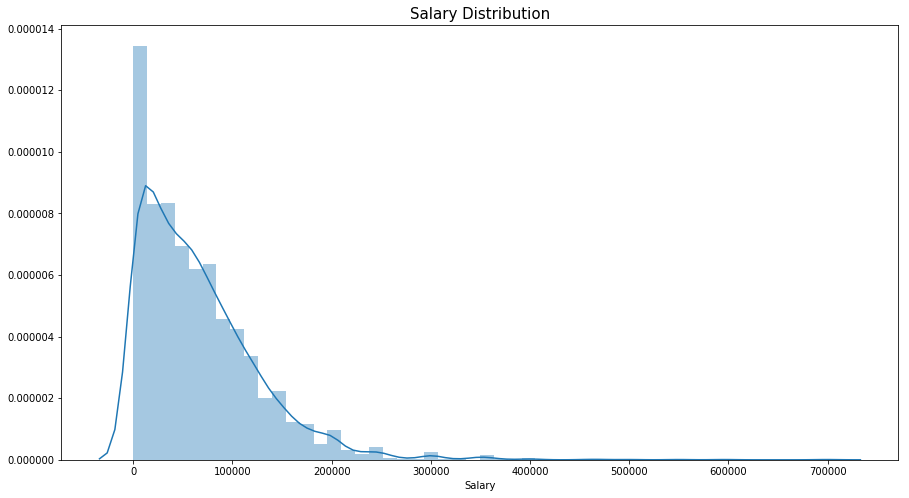

In [19]:
plt.subplots(figsize=(15,8))
salary = salary[salary['Salary']<1000000]
sns.distplot(salary['Salary'])
plt.title('Salary Distribution',size=15)
plt.show()

## Compensation by Country

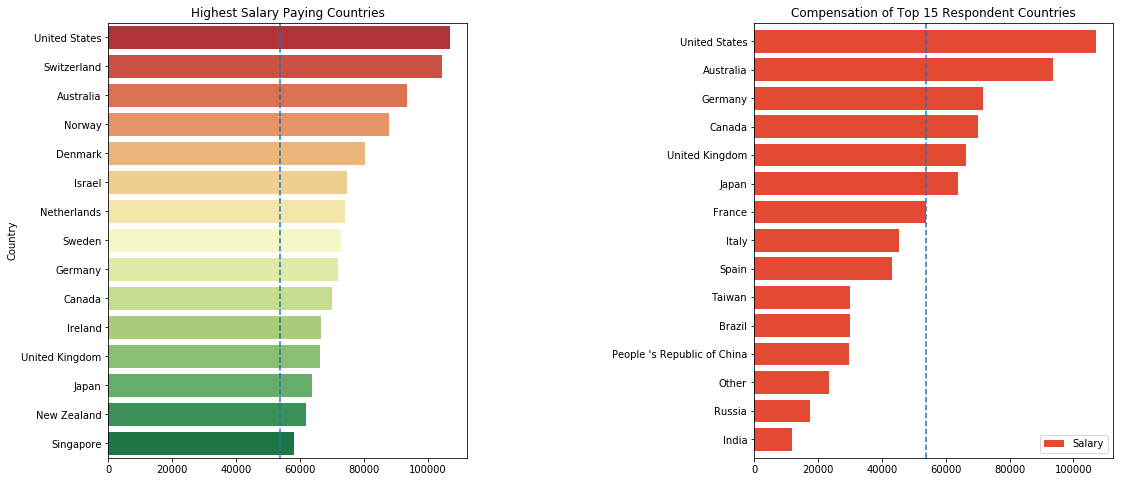

In [20]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sal_coun=salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('Salary', sal_coun.index, data=sal_coun, palette='RdYlGn', ax=ax[0])
ax[0].axvline(salary['Salary'].median(), linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')
max_coun=salary.groupby('Country')['Salary'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='Salary', ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(), linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()



The left graph shows the Top 15 high median salary paying countries. It is good to see that these countries provide salary more than the median salary of the complete dataset. Similarly,the right graph shows median salary of the Top 15 Countries by respondents. The most shocking graph is for India. India has the 2nd highest respondents, but still it has the lowest median salary in the graph. Individuals in USA have a salary almost 10 times more than their counterparts in India. What may be the reason?? Are IT professionals in India really underpaid?? We will check that later.

In [21]:
resp_coun.index

Index(['United States', 'India', 'Other', 'Russia', 'United Kingdom',
       'People 's Republic of China', 'Brazil', 'Germany', 'France', 'Canada',
       'Australia', 'Spain', 'Japan', 'Taiwan', 'Italy'],
      dtype='object')

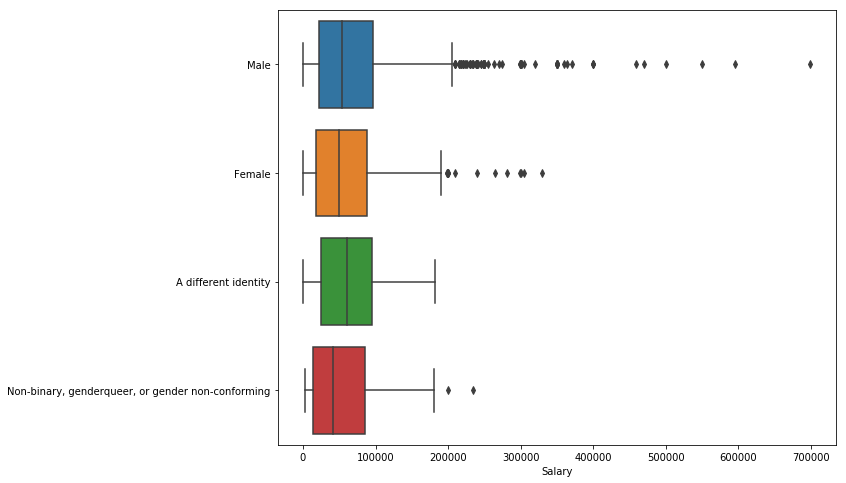

In [22]:
plt.subplots(figsize=(10,8))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)
plt.ylabel('')
plt.show()

The salary for males look to be high as compared to others.

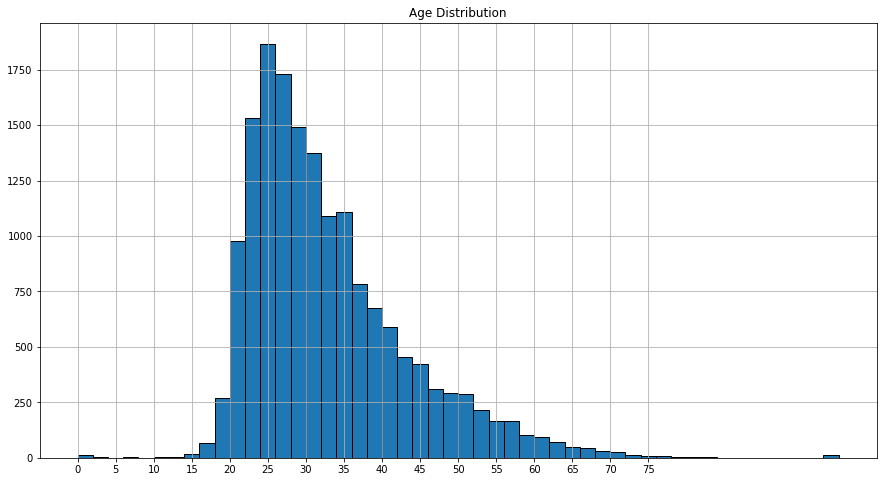

In [23]:
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50,edgecolor='black')
plt.xticks(list(range(0,80,5)))
plt.title('Age Distribution')
plt.show() 

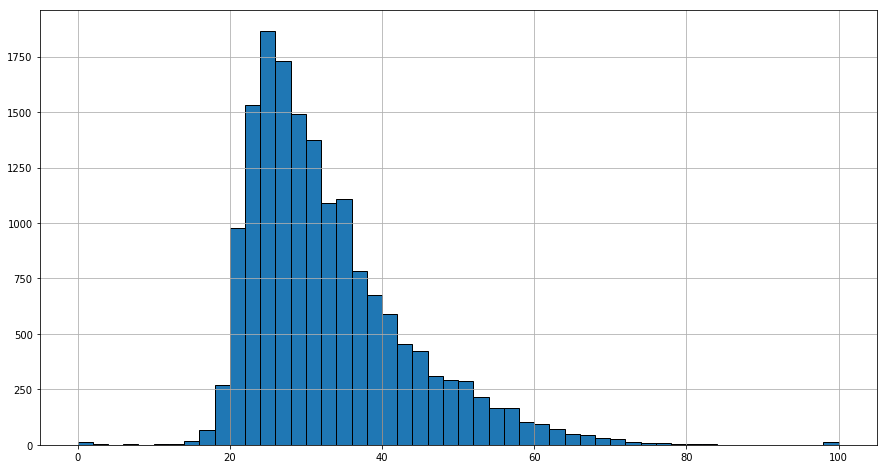

In [24]:
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50,edgecolor='black')


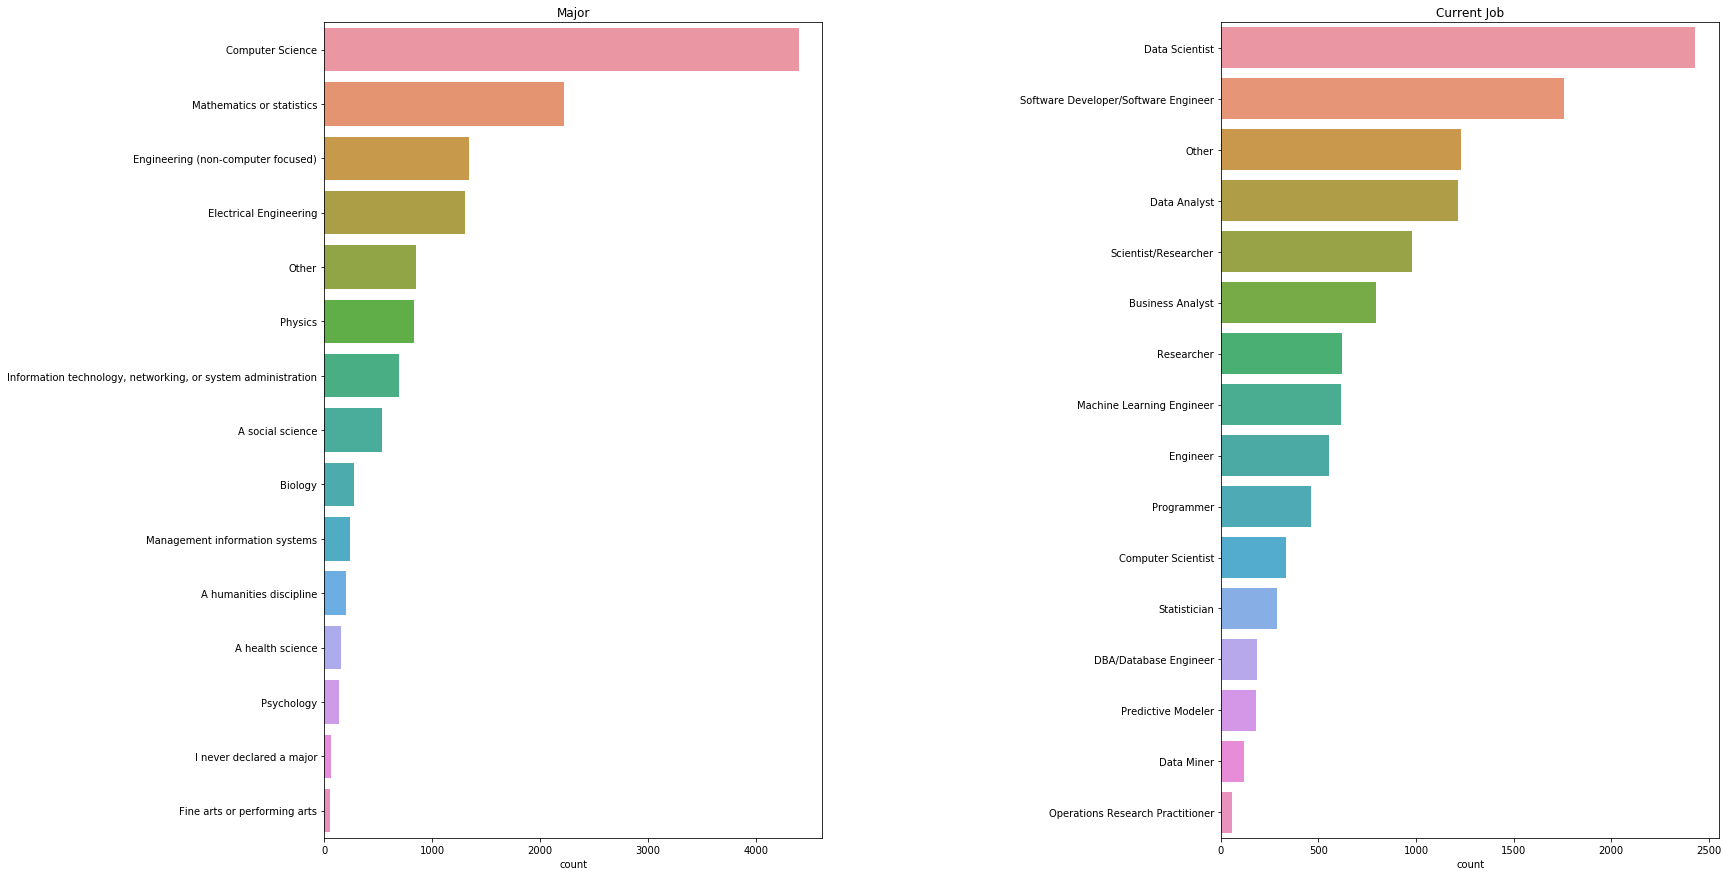

In [25]:
#list(range(0,80,5))
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.countplot(y=response['MajorSelect'], ax=ax[0], order=response['MajorSelect'].value_counts().index)

#sns.set(rc={"font.style":"normal",
#            "axes.facecolor":bg_color,
#            "figure.facecolor":bg_color,
#            "text.color":"black",
#            "xtick.color":"black",
#            "ytick.color":"black",
#            "axes.labelcolor":"black",
#            "axes.grid":False,
#            'axes.labelsize':30,
#            'figure.figsize':(25.0, 15.0),
#            'xtick.labelsize':25,
#            'ytick.labelsize':20})

ax[0].set_title('Major')
ax[0].set_ylabel('')

sns.countplot(y=response['CurrentJobTitleSelect'],ax=ax[1],order=response['CurrentJobTitleSelect'].value_counts().index)
ax[1].set_title('Current Job')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)

plt.show()

In [26]:
response.MajorSelect.value_counts()

Computer Science                                                4397
Mathematics or statistics                                       2220
Engineering (non-computer focused)                              1339
Electrical Engineering                                          1303
Other                                                            848
Physics                                                          830
Information technology, networking, or system administration     693
A social science                                                 531
Biology                                                          274
Management information systems                                   237
A humanities discipline                                          198
A health science                                                 152
Psychology                                                       137
I never declared a major                                          65
Fine arts or performing arts      

In [27]:
response['MajorSelect'].value_counts()

Computer Science                                                4397
Mathematics or statistics                                       2220
Engineering (non-computer focused)                              1339
Electrical Engineering                                          1303
Other                                                            848
Physics                                                          830
Information technology, networking, or system administration     693
A social science                                                 531
Biology                                                          274
Management information systems                                   237
A humanities discipline                                          198
A health science                                                 152
Psychology                                                       137
I never declared a major                                          65
Fine arts or performing arts      

Data Science and Machine Learning is used in almost every industry. This is evident from the left graph,as people from different areas of interest like Physics, Biology, etc are taking it up for better understanding of the data. The right side graph shows the Current Job of the respondents. A major portion of the respondents are Dats Scientists. But as it is survey data, we know that there may be many ambigious responses. Later on we will check are these respondents real datas-scientists or self proclaimed data-scientists.

## Compensation By Job Title

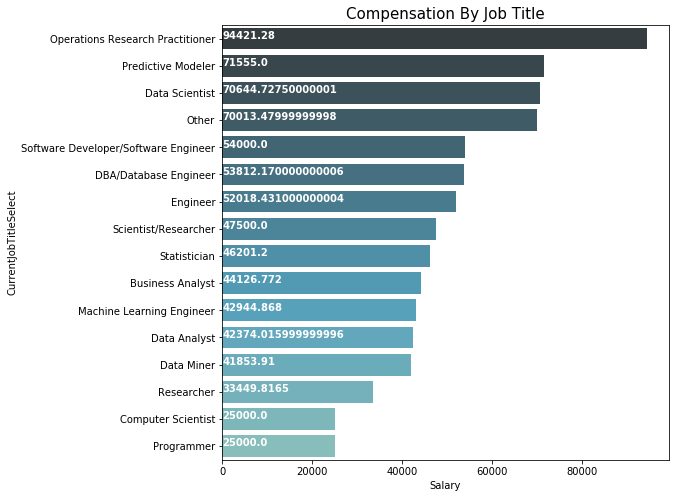

In [28]:
sal_job=salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary',ascending=False)
#ax=sns.barplot(sal_job.Salary, sal_job.index, palette=sns.color_palette("Blues",20))
ax=sns.barplot(sal_job.Salary, sal_job.index, palette=sns.color_palette("GnBu_d",20))

plt.title('Compensation By Job Title',size=15)
for i , v in enumerate(sal_job.Salary):
    ax.text(.5, i, v, fontsize=10, color='white', weight='bold')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()
#sns.color_palette

Operations Research Practitioner has the highest median salary followed by Predictive Modeler and Data Scientist. Computer Scientist and Programmers have the lowest compensation.

## Machine Learning

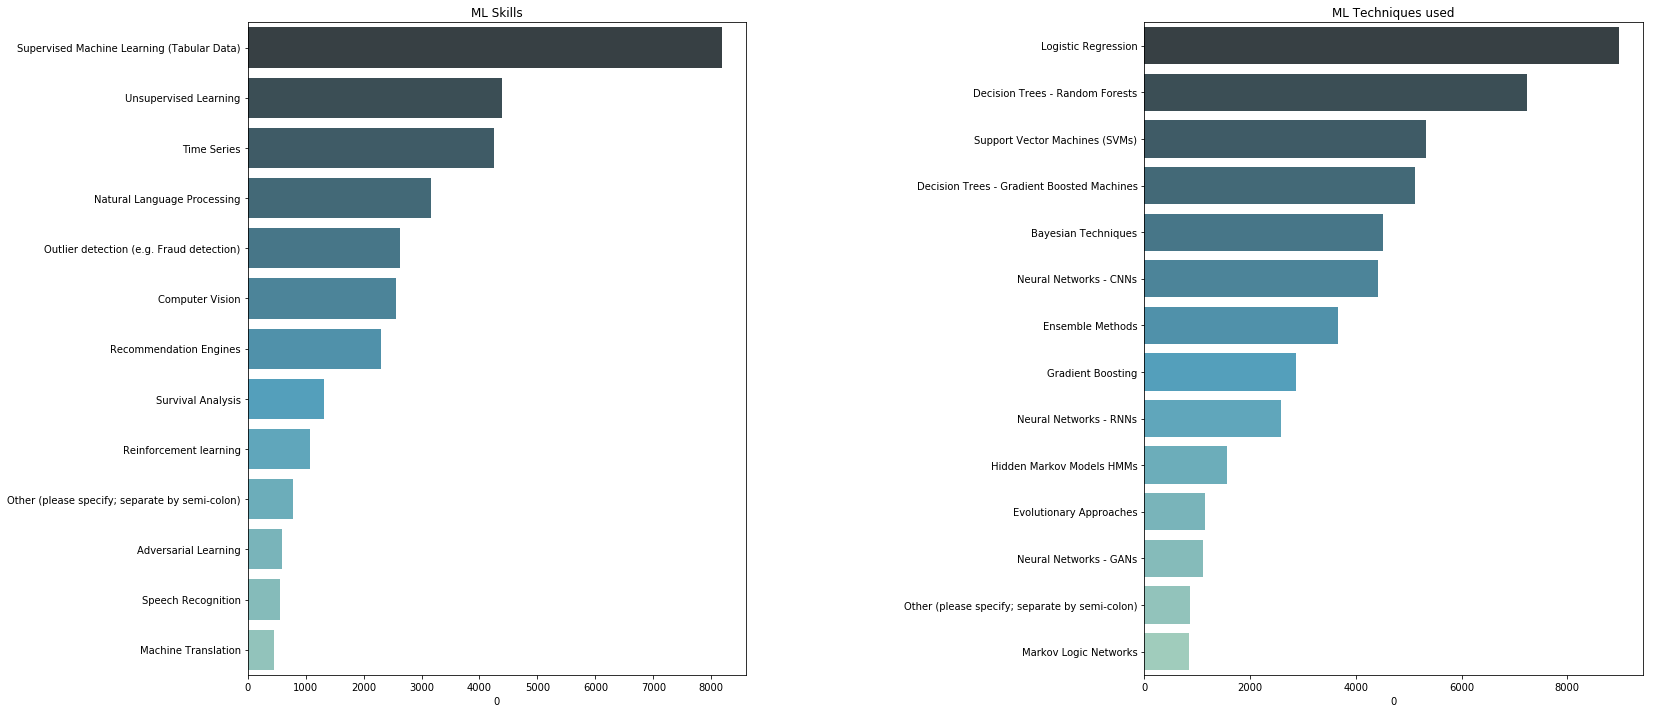

In [29]:
f,ax = plt.subplots(1,2,figsize=(25,12))
skills=response['MLSkillsSelect'].str.split(',')
skills_set=[]
#for idx, i in enumerate(skills.dropna()):
#    print(idx, i)
    #skills_set.extend(i)
for i in skills.dropna():
    skills_set.extend(i)
plt1=pd.Series(skills_set).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0], plt1.index, ax=ax[0],palette=sns.color_palette("GnBu_d",15))
ax[0].set_title('ML Skills')

tech=response['MLTechniquesSelect'].str.split(',')
techniques=[]
for i in tech.dropna():
    techniques.extend(i)
plt1=pd.Series(techniques).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette("GnBu_d",15))
ax[1].set_title('ML Techniques used')
plt.subplots_adjust(wspace=0.8)
plt.show()

It is evident that most of the respondents are working with Supervised Learning, 
and Logistic Regression being the favorite among them. 

There is no algorithm that is the best for all classification domains. 

A way to select one algorithm for a particular domain is by means of crossvalidation on the training data.

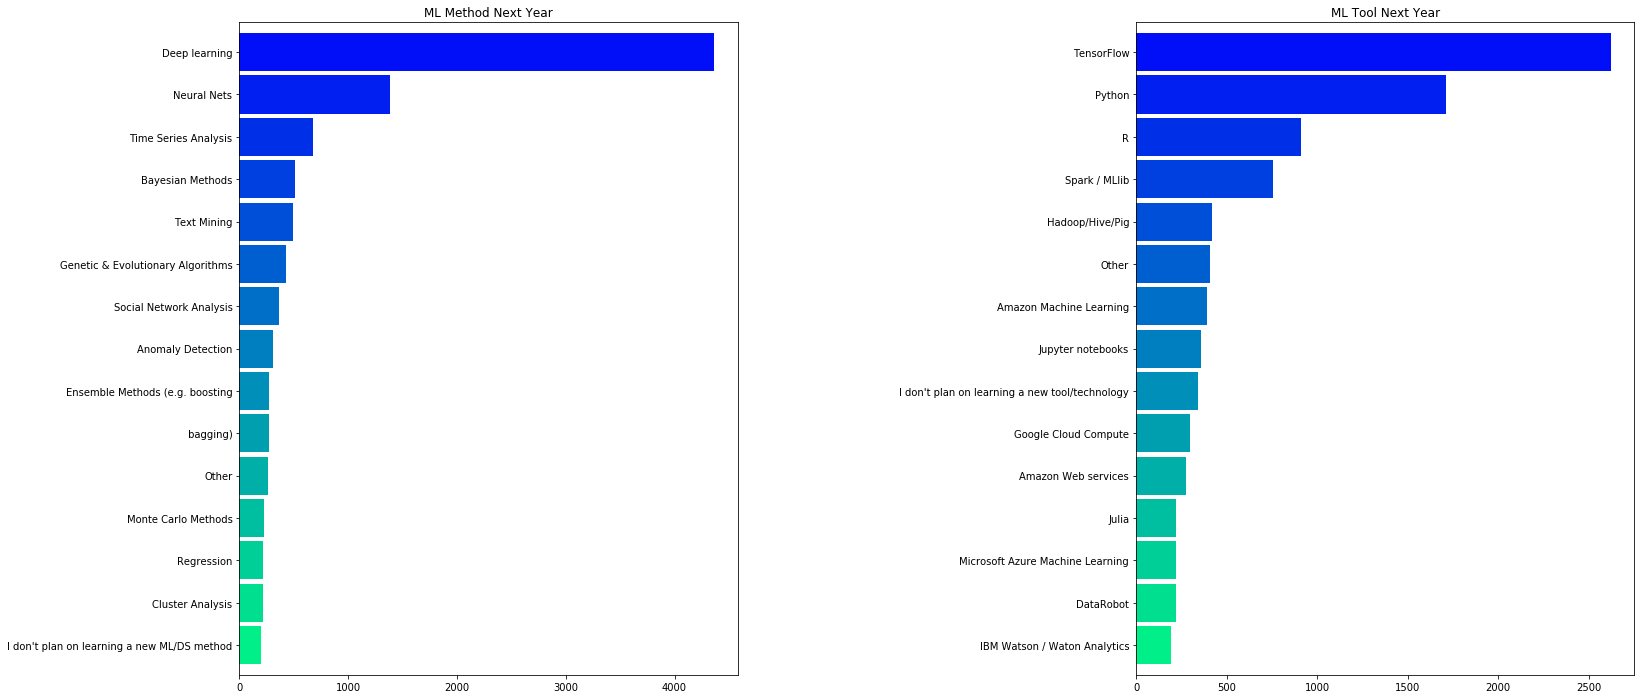

In [30]:
f,ax=plt.subplots(1,2,figsize=(25,12))
ml_nxt=response['MLMethodNextYearSelect'].str.split(',')
nxt_year=[]
for i in ml_nxt.dropna():
    nxt_year.extend(i)
pd.Series(nxt_year).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[0])
tool=response['MLToolNextYearSelect'].str.split(',')
tool_nxt=[]
for i in tool.dropna():
    tool_nxt.extend(i)
pd.Series(tool_nxt).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[1])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('ML Method Next Year')
ax[1].set_title('ML Tool Next Year')
plt.show()

It is evident that the next year is going to see a jump in number of Deep Learning practitioners. Deep Learning and neural nets or in short AI is a favorite hot-topic for the next Year. Also in terms of Tools, Python is preferred more over R. Big Data Tools like Spark and Hadoop also have a good share in the coming years.

## Best Platforms to Learn

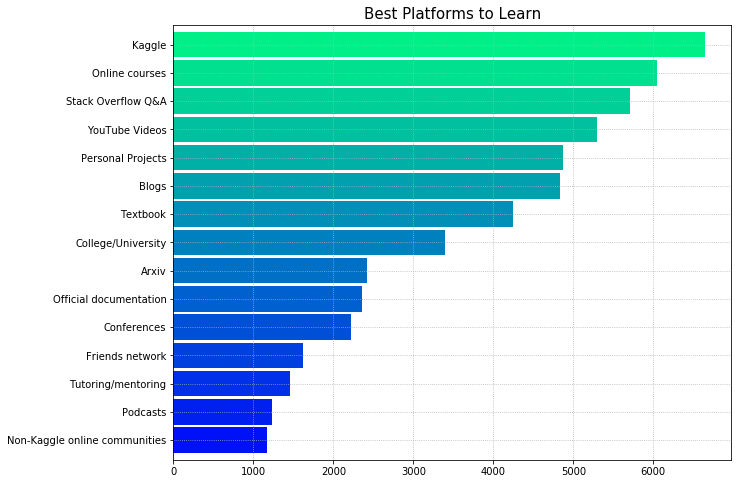

Kaggle                           6645
Online courses                   6042
Stack Overflow Q&A               5703
YouTube Videos                   5291
Personal Projects                4873
Blogs                            4828
Textbook                         4246
College/University               3397
Arxiv                            2418
Official documentation           2354
Conferences                      2217
Friends network                  1617
Tutoring/mentoring               1458
Podcasts                         1238
Non-Kaggle online communities    1169
Newsletters                      1112
Company internal community        996
Other                             518
Trade book                        337
dtype: int64

In [31]:
plt.subplots(figsize=(10,8))
learn=response['LearningPlatformSelect'].str.split(',')
platform=[]
for i in learn.dropna():
    platform.extend(i)
pd.Series(platform).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter',15))
plt.title('Best Platforms to Learn',size=15)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xticks(list(range(0,7000,1000)))
plt.grid(linestyle='dotted')
plt.show()
pd.Series(platform).value_counts()

My personal favorite Kaggle, is the most sought after source for learning Data Science, as it has notebooks from really experienced Data Scientists. The next choice is Online Courses i.e MOOC's. Platforms like coursera,udacity provide interactive videos and exercises for learning. Similary Youtube channels like Siraj Raval and others offer a free medium to study. These all medium are above than Textbooks. The reason maybe that textbooks often have limited content, or people are more fond of watching videos and learning.

## Hardware Used

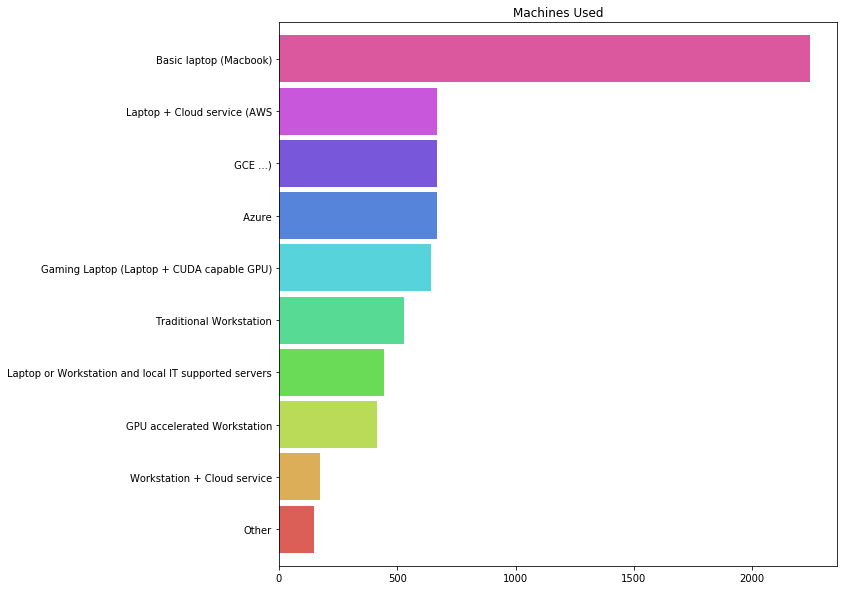

In [32]:
plt.subplots(figsize=(10,10))
hard=response['HardwarePersonalProjectsSelect'].str.split(',')
hardware=[]
for i in hard.dropna():
    hardware.extend(i)
pd.Series(hardware).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette("hls",10))
plt.title('Machines Used')
plt.show()
#sns.palplot(sns.color_palette("hls",24))
#sns.palplot(sns.hls_palette(24))

Since majority of the respondents fall in the age category below 25, which is where a majority of students fall under, thus a basic Laptop is the most commonly used machine for work.


## Where Do I get Datasets From

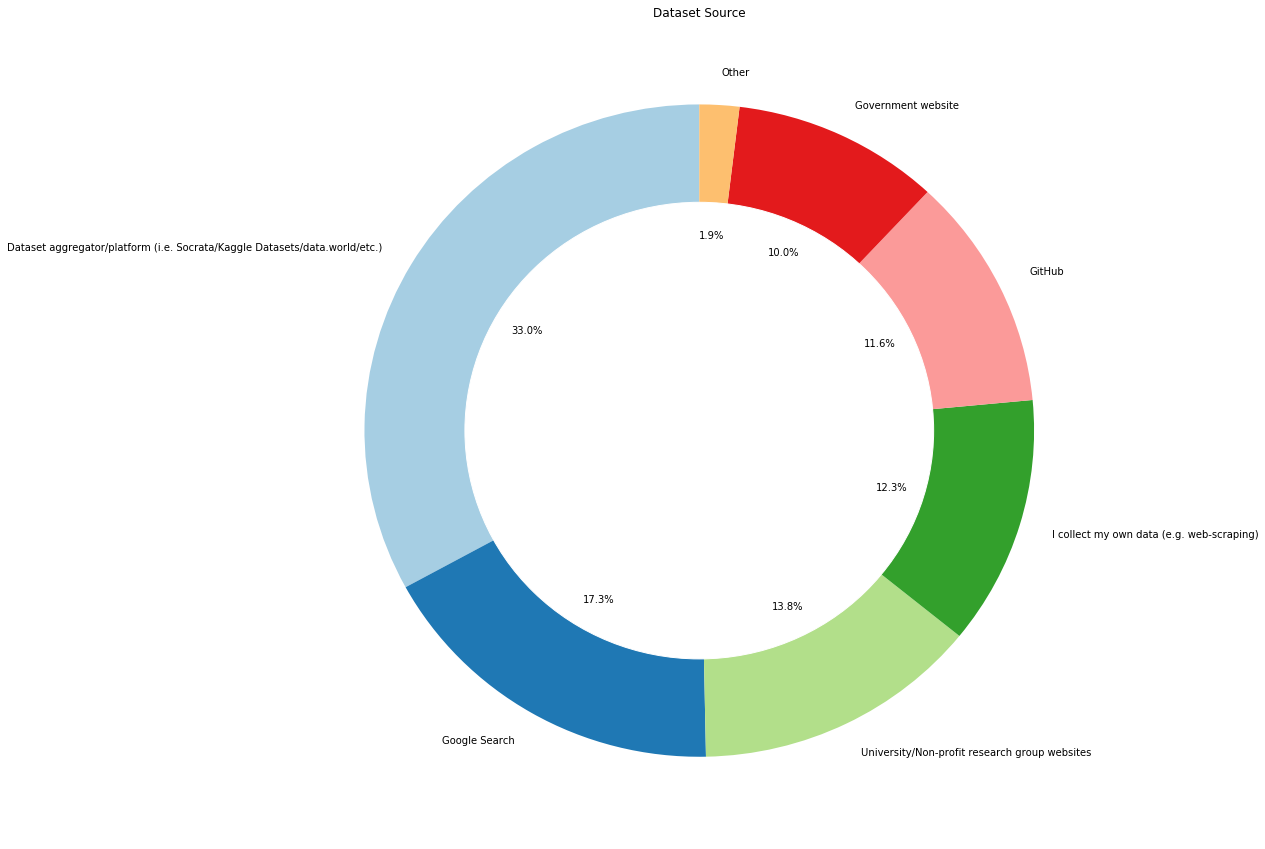

Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.)    6843
Google Search                                                                 3600
University/Non-profit research group websites                                 2873
I collect my own data (e.g. web-scraping)                                     2560
GitHub                                                                        2400
Government website                                                            2079
Other                                                                          399
dtype: int64

In [33]:
plt.subplots(figsize=(15,15))
data=response['PublicDatasetsSelect'].str.split(',')
dataset=[]
for i in data.dropna():
    dataset.extend(i)
#pd.Series(dataset).value_counts().plot.pie(autopct='%1.1f%%',colors=sns.color_palette('Paired',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
pd.Series(dataset).value_counts().plot.pie(autopct='%1.1f%%',colors=sns.color_palette('Paired',10),startangle=90)
plt.title('Dataset Source')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()
pd.Series(dataset).value_counts()

With hundreds of Dataset available, Kaggle is the most sought after source for datasets.

## Code Sharing

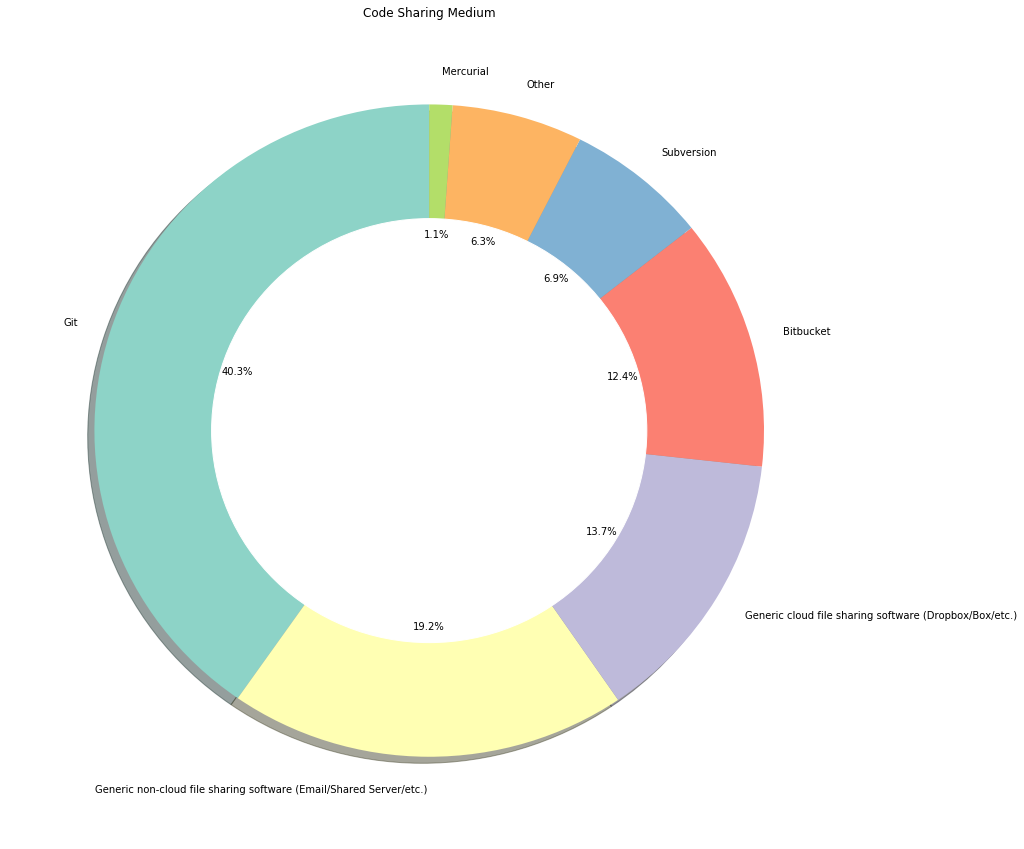

Git                                                                   3620
Generic non-cloud file sharing software (Email/Shared Server/etc.)    1727
Generic cloud file sharing software (Dropbox/Box/etc.)                1230
Bitbucket                                                             1117
Subversion                                                             618
Other                                                                  568
Mercurial                                                              100
dtype: int64

In [34]:
plt.subplots(figsize=(15,15))
code=response['WorkCodeSharing'].str.split(',')
code_share=[]
for i in code.dropna():
    code_share.extend(i)
pd.Series(code_share).value_counts().plot.pie(autopct='%1.1f%%', shadow=True,colors=sns.color_palette('Set3',10), startangle=90)
plt.title('Code Sharing Medium')
my_circle=plt.Circle((0,0), 0.65, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()
pd.Series(code_share).value_counts()

Github is the most used platform for Code and project sharing. The advantages of using github are:

1)Version control your projects.

2)Explore other’s projects on GitHub, get inspired code more, or contribute to their project.

3)Collaborate with others, by letting other people contribute to your projects or you contributing to other’s projects, and many more.



## Challenges in Data Science

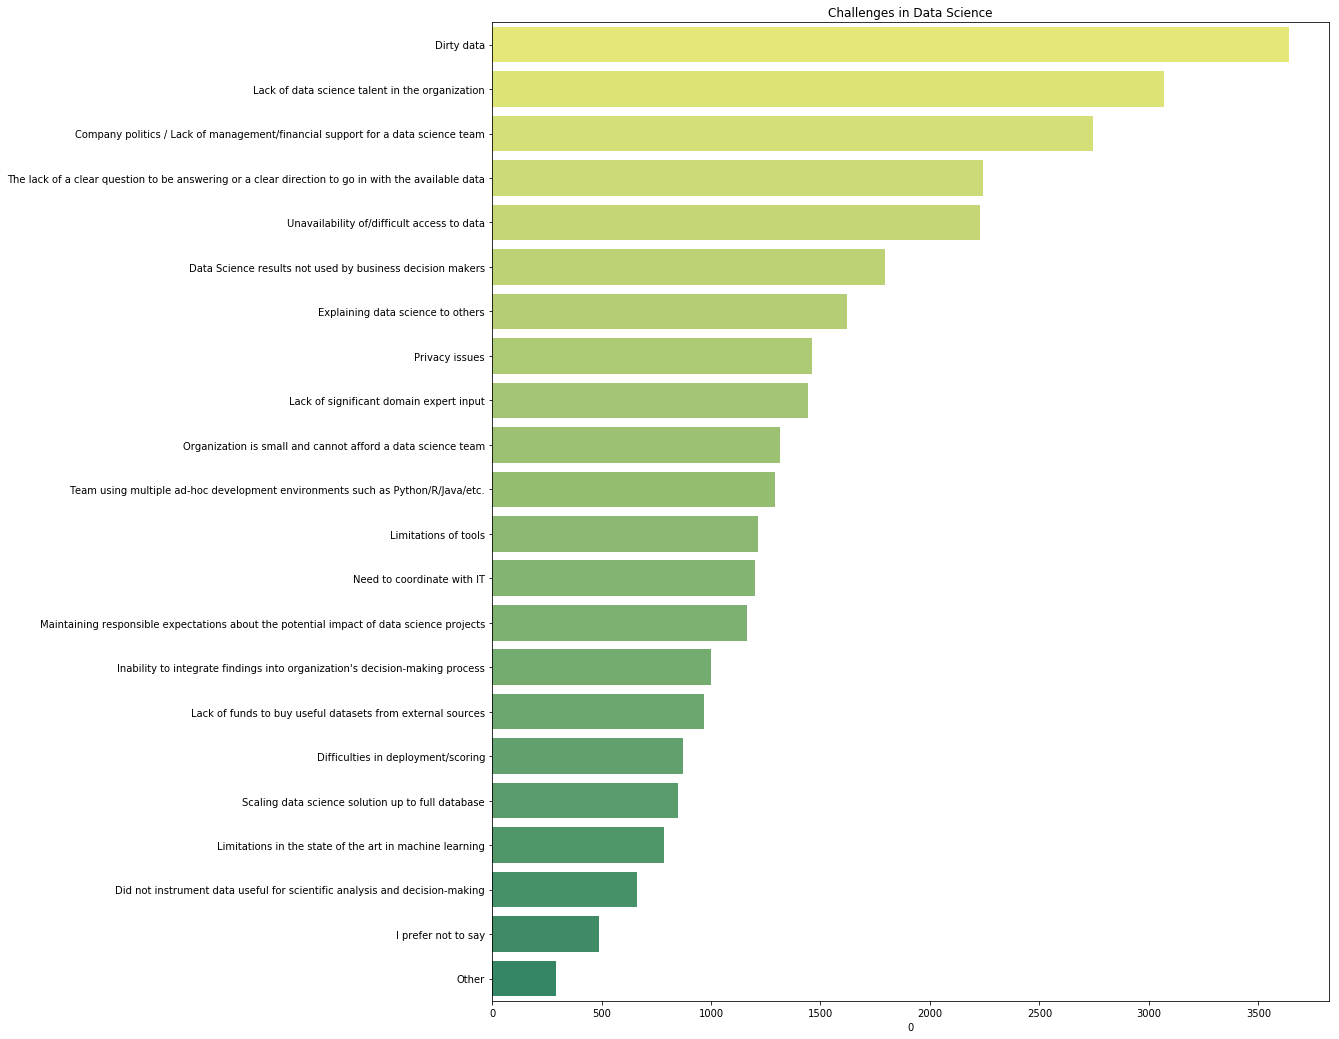

In [35]:
plt.subplots(figsize=(15,18))
challenge=response['WorkChallengesSelect'].str.split(',')
challenges=[]
for i in challenge.dropna():
    challenges.extend(i)
plt1=pd.Series(challenges).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,palette=sns.color_palette('summer_r',25))
plt.title('Challenges in Data Science')
plt.show()






















The main challenge in Data Science is getting the proper Data. The graph clearly shows that dirty data is the bigget challenge. Now what is dirty data?? Dirty data is a database record that contains errors. Dirty data can be caused by a number of factors including duplicate records, incomplete or outdated data, and the improper parsing of record fields from disparate systems. Luckily Kaggle datasets are pretty clean and standardised.

Some other major challenges are the Lack of Data Science and machine learning talent, difficulty in getting data and lack of tools. Thats why Data Science is the sexiest job in 21st century.With the increasing amount of data, this demand will substantially grow.

## Job Satisfaction

16716


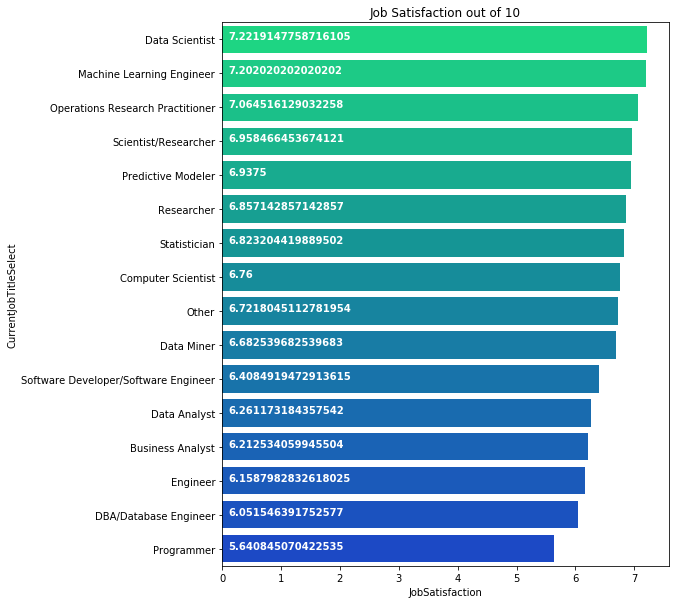

In [36]:
satisfy=response.copy()
#satisfy['JobSatisfaction'].unique()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':10,'1 - Highly Dissatisfied':1,'I prefer not to share':np.NaN}, inplace=True)
print(len(satisfy))
satisfy.dropna(subset=['JobSatisfaction'], inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=False).to_frame()
ax=sns.barplot(y=satisfy_job.index, x=satisfy_job.JobSatisfaction,palette=sns.color_palette('winter_r',20))
fig=plt.gcf()
fig.set_size_inches(8,10)
for i,v in enumerate(satisfy_job.JobSatisfaction):
    ax.text(.1, i, v, fontsize=10, color='white', weight='bold')
plt.title('Job Satisfaction out of 10')
plt.show()
#satisfy_job.index

Data Scientists and Machine Learning engineers are the most satisfied people(who won't be happy with so much money), while Programmers have the lowest job satisfaction. But the thing to note here is that even if Computer Scientists have a lower salary than Programmers, still they have a good job satisfaction level than programmers. Thus Salary is not the only criteria or job satisfaction.


## Job Satisfication By Country

In [37]:
satisfy=response.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'1','I prefer not to share':np.NaN},inplace=True)
satisfy.dropna(subset=['JobSatisfaction'],inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['Country'])['JobSatisfaction'].mean().sort_values(ascending=True).to_frame()
data=[dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = 'Viridis',
        reversescale = True,
        showscale = True,
        locations = satisfy_job.index,
        z = satisfy_job['JobSatisfaction'],
        locationmode = 'country names',
        text = satisfy_job['JobSatisfaction'],
        marker = dict(
            line = dict(color = 'rgb(200,200,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Satisfaction')
    )]
layout = dict(
    title = 'Job Satisfaction By Country',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(0,0,255)',
        projection = dict(
        type = 'chloropleth',
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2010')

he average Job Satisfaction level is between 6-7.5 for most of the countries. It is lower in Japan(where people work for about 14 hours) and China. It is higher in come countries like Sweden and Mexico.

Python and R are the most widely used Open-Source languages for Data Science and Machine-Learning stuff. For a budding data scientist or analyst, the biggest and trickiest doubt is: Which Language Should I Start With?? While both the languages have their own advantages and shortcomings, it depends on the individual's purpose while selecting a language of his/her choice. Both the languages cater the needs of different kinds of work. Python is a general purpose langauge, thus web and application integration is easier, while R is meant for pure statistical and analytics purpose. The area where R will completely beat Python is visualisations with the help of packages like ggplot2 and shiny. But Python has an upperhand in Machine Learning stuff. So lets see what the surveyers say..

In [38]:
resp=response.dropna(subset=['WorkToolsSelect'])
resp=resp.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
python=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(~resp['WorkToolsSelect'].str.contains('R'))]
R=resp[(~resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]
both=resp[(resp['WorkToolsSelect'].str.contains('Python'))&(resp['WorkToolsSelect'].str.contains('R'))]

## Recommended Language For Begineers

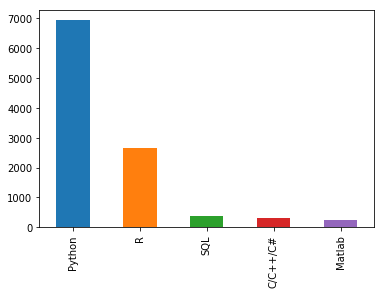

In [39]:
#response['LanguageRecommendationSelect'].value_counts()[:2].plot.bar()
#plt.show()
#response['LanguageRecommendationSelect'].value_counts()
#response['LanguageRecommendationSelect']
response['LanguageRecommendationSelect'].value_counts()[:5].plot.bar()
plt.show()






Clearly Python is the recommended language for begineers. The reason for this maybe due to its simple english-like syntax and general purpose functionality.


## Recommendation By Python and R users

In [40]:
labels1=python['LanguageRecommendationSelect'].value_counts()[:5].index
sizes1=python['LanguageRecommendationSelect'].value_counts()[:5].values
labels2=R['LanguageRecommendationSelect'].value_counts()[:5].index
sizes2=R['LanguageRecommendationSelect'].value_counts()[:5].values

print(labels1)
print(sizes1)
print(labels2)
print(sizes2)

fig = {
  "data": [
    {
      "values": sizes1,
      "labels": labels1,
      "domain": {"x": [0, .48]},
      "name": "Language",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": sizes2 ,
      "labels": labels2,
      "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Language",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Language Recommended By Python and R users",
        "annotations": [
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "Python",
                "x": 0.17,
                "y": 0.5
            },
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "R",
                "x": 0.79,
                "y": 0.5}]}}
py.iplot(fig, filename='donut')


Index(['Python', 'C/C++/C#', 'Matlab', 'SQL', 'R'], dtype='object')
[1742   48   43   36   32]
Index(['R', 'Python', 'SQL', 'C/C++/C#', 'Java'], dtype='object')
[632 194  75  27  13]


This is a interesting find. About 91.6% Python users recommend Python as the first language for begineers, whereas only 67.2% R users recommend R as the first language. Also 20.6% R users recommend Python but only 1.68% Python users recommend R as the first language. One thing to note is that users of both recommend the same Languages i.e SQL, Matlab and C/C++. I have only considered the Top 5 recommended languages, so the percentage will change if we consider all of them. But the difference would be just 2-3%.

## Necessary or Not

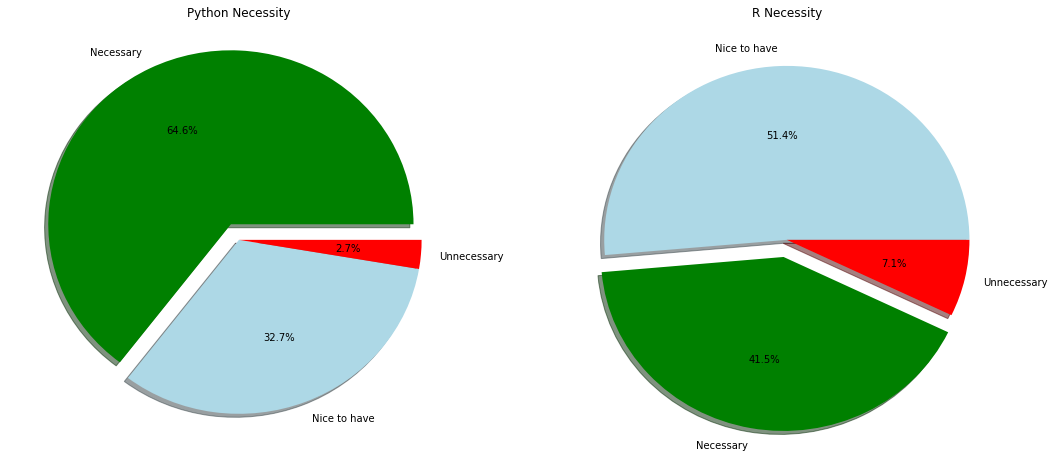

In [41]:
f,ax=plt.subplots(1,2,figsize=(18,8))
response['JobSkillImportancePython'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',explode=[0.1,0,0], shadow=True, colors=['g','lightblue','r'])
ax[0].set_title('Python Necessity')
ax[0].set_ylabel('')
response['JobSkillImportanceR'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0,0.1,0],shadow=True,colors=['lightblue','g','r'])
ax[1].set_title('R Necessity')
ax[1].set_ylabel('')
plt.show()


Clearly Python is a much more necessary skill compared to R.

Special Thanks to Steve Broll for helping in the color scheme.

## Number Of Users By Language

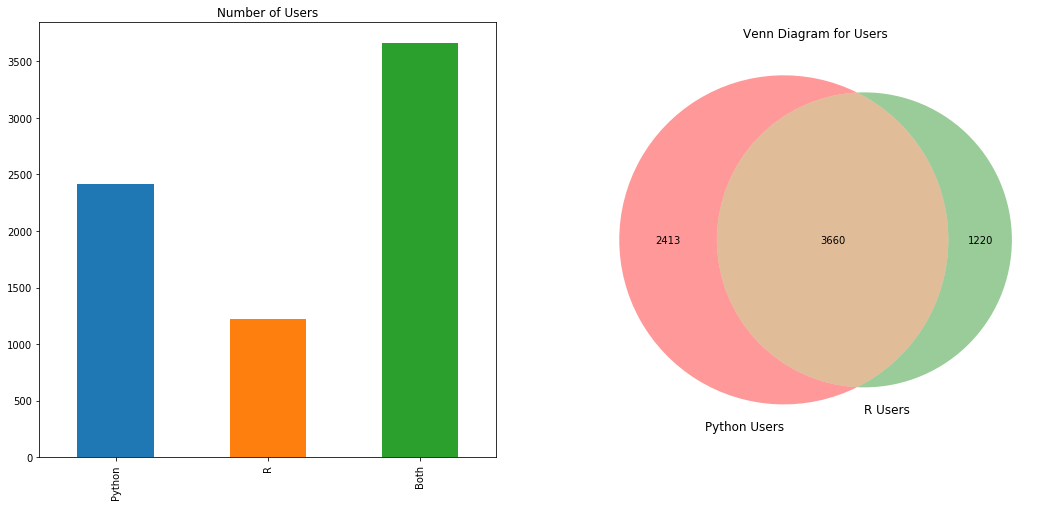

In [42]:
from matplotlib_venn import venn2
f,ax=plt.subplots(1,2,figsize=(18,8))
pd.Series([python.shape[0],R.shape[0],both.shape[0]],index=['Python','R','Both']).plot.bar(ax=ax[0])
ax[0].set_title('Number of Users')
venn2(subsets = (python.shape[0],R.shape[0],both.shape[0]), set_labels = ('Python Users', 'R Users'))
plt.title('Venn Diagram for Users')
plt.show()

The number of Python users are definetely more than R users. This may be due to the easy learning curve of Python. However there are more users who know both the languages. These responses might be from established Data Scientists,as they tend to have a knowledge in multiple languages and tools.

## Compensation

Median Salary For Individual using Python: 48725.600000000006
Median Salary For Individual using R: 48421.99999999999
Median Salary For Individual knowing both languages: 59791.3


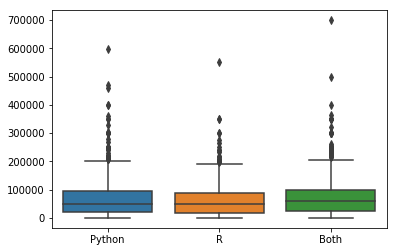

In [43]:
#py_sal=(pd.)
py_sal=(pd.to_numeric(python['CompensationAmount'].dropna())*python['exchangeRate']).dropna()
py_sal=py_sal[py_sal<1000000]
R_sal=(pd.to_numeric(R['CompensationAmount'].dropna())*R['exchangeRate']).dropna()
R_sal=R_sal[R_sal<1000000]
both_sal=(pd.to_numeric(both['CompensationAmount'].dropna())*both['exchangeRate']).dropna()
both_sal=both_sal[both_sal<1000000]
trying=pd.DataFrame([py_sal,R_sal,both_sal])
trying=trying.transpose()
trying.columns=['Python','R','Both']
print('Median Salary For Individual using Python:',trying['Python'].median())
print('Median Salary For Individual using R:',trying['R'].median())
print('Median Salary For Individual knowing both languages:',trying['Both'].median())

#trying.plot.box()
#plt.title('Compensation By Language')
#fig=plt.gcf()
#fig.set_size_inches(10,6)
#plt.show()
sns.boxplot(data=trying)
plt.ylabel('')
plt.show()

Python coders have a slightly higher median salary as that compared to their R counterparts. However, the people who know both these languages, have a pretty high median salary as compared to both of them.



## Language Used By Professionals

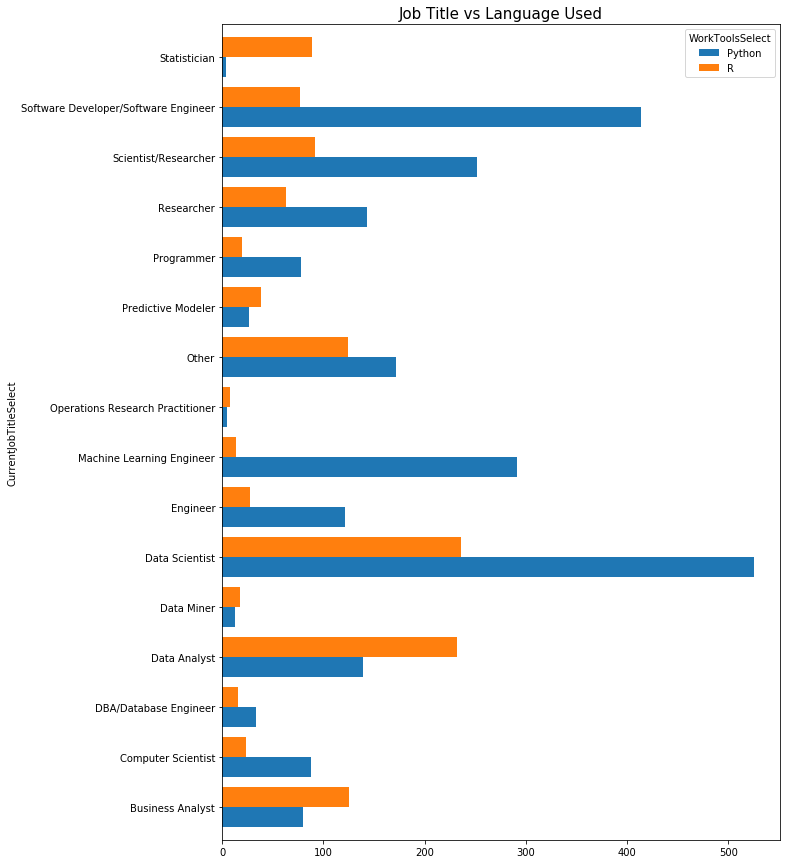

In [44]:
py1=python.copy()
r=R.copy()
py1['WorkToolsSelect']='Python'
r['WorkToolsSelect']='R'
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['CurrentJobTitleSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('CurrentJobTitleSelect','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,15)
plt.title('Job Title vs Language Used',size=15)
plt.show()

As I had mentioned earlier, R beats Python in visuals. Thus people with Job-Titles like Data Analyst, Business Analyst where graphs and visuals play a very prominent role, prefer R over Python. Similarly almost 90% of statisticians use R. Also as stated earlier, Python is better in Machine Learning stuff, thus Machine Learning engineers, Data Scientists and others like DBA or Programmers prefer Python over R.

Thus for data visuals--->R else---->Python.

#### Note: This graph is not for Language Recommended by professionals, but the tools used by the professionals.

## Job Function vs Language

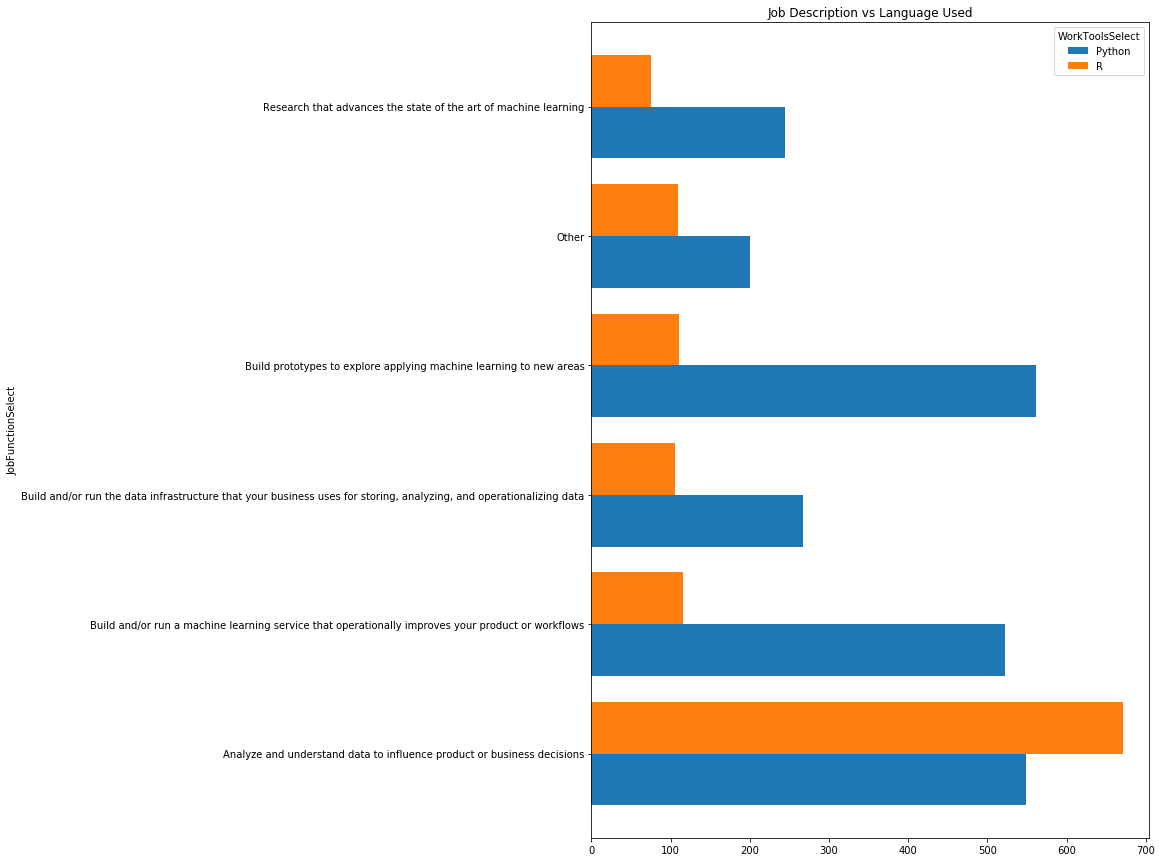

In [45]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['JobFunctionSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('JobFunctionSelect','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,15)
plt.title('Job Description vs Language Used')
plt.show()

## Tenure vs Language Used

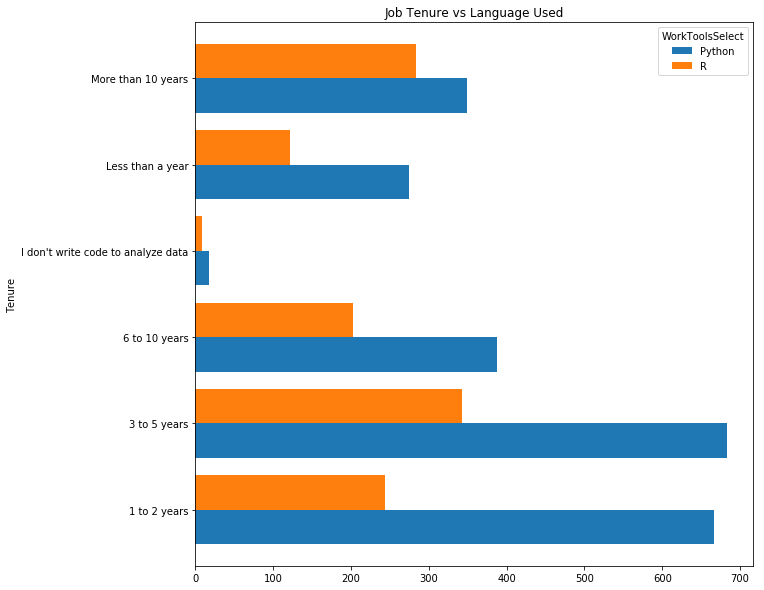

In [46]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['Tenure','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('Tenure','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Job Tenure vs Language Used')
plt.show()

As we had seen earlier, Python is highly recommended for beginners. Thus the proportion of Python users is more in the initial years of coding. The gap between the languages however reduces over the years, as the coding experience increases.

## Industry vs Language Used




























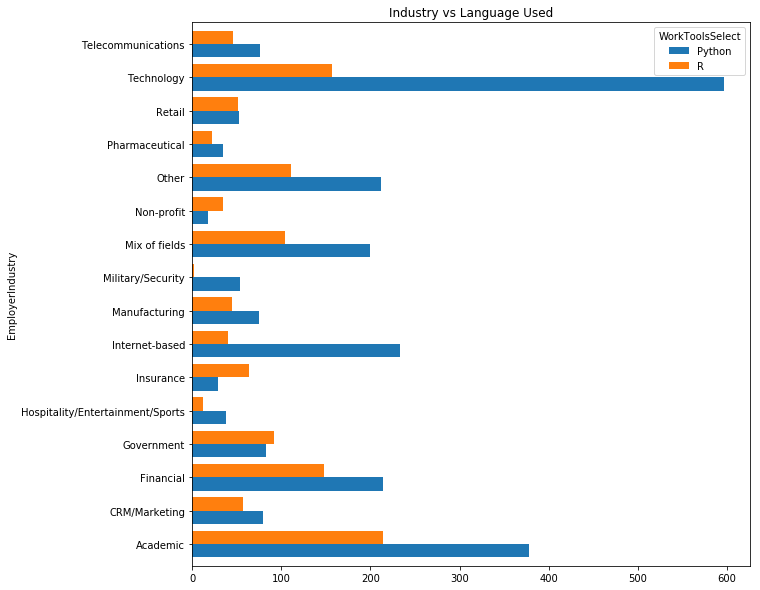

In [47]:
r_vs_py=pd.concat([py1,r])
r_vs_py=r_vs_py.groupby(['EmployerIndustry','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('EmployerIndustry','WorkToolsSelect','Age').plot.barh(width=0.8)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Industry vs Language Used')
plt.show()

R beats Python in Government, Insurance and Non-Profits industries. Similarly, Python beats R with a very big margin in Technology and Military industry. In remaining other industries, the share of Python looks to be roughly 15-20% more than that of R.



## Common Tools with Python and R

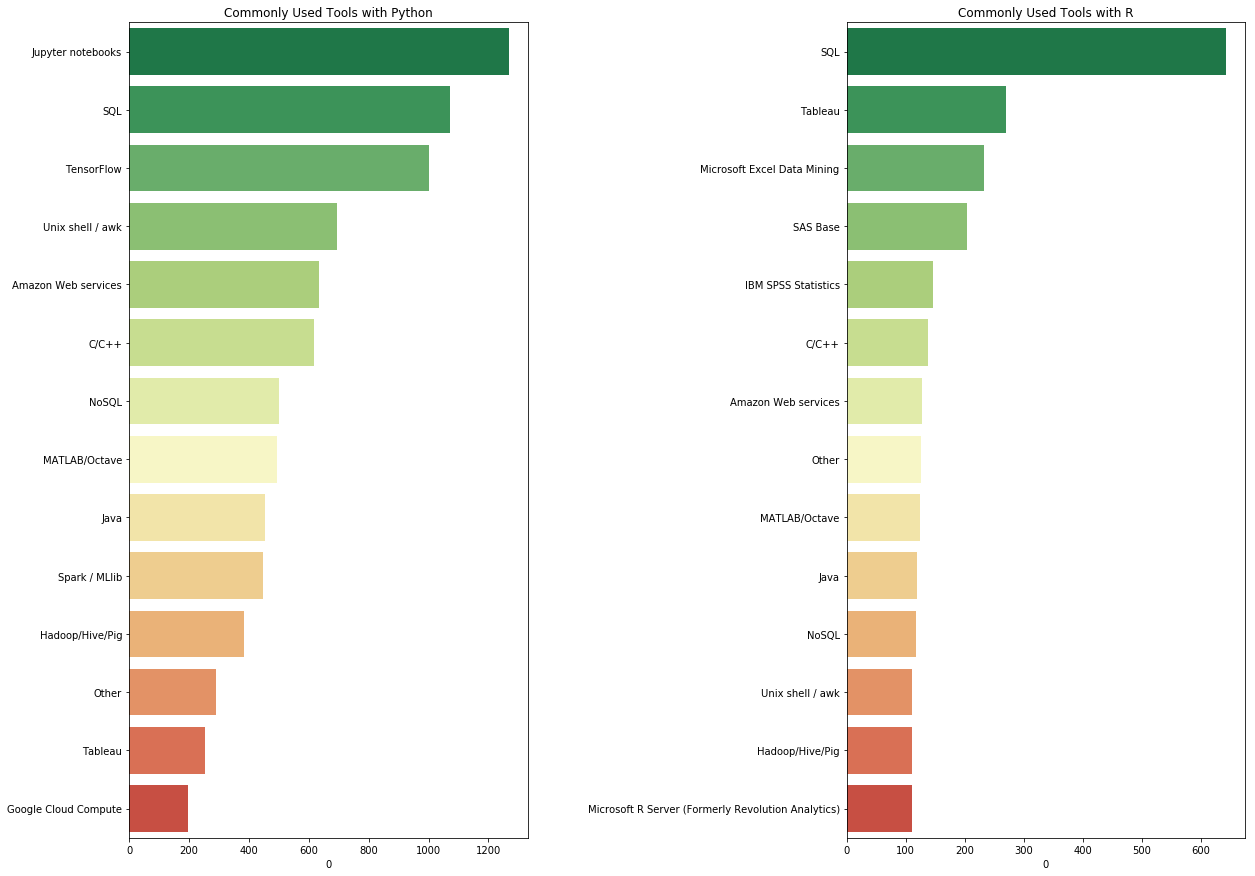

In [48]:
f, ax=plt.subplots(1,2,figsize=(20,15))
py_comp=python['WorkToolsSelect'].str.split(',')
py_comp1=[]
for i in py_comp:
    py_comp1.extend(i)
plt1=pd.Series(py_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[0],palette=sns.color_palette('RdYlGn_r',15))
R_comp=R['WorkToolsSelect'].str.split(',')
R_comp1=[]
for i in R_comp:
    R_comp1.extend(i)
plt1=pd.Series(R_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette('RdYlGn_r',15))
ax[0].set_title('Commonly Used Tools with Python')
ax[1].set_title('Commonly Used Tools with R')
plt.subplots_adjust(wspace=0.8)
plt.show()


SQL seems to be the most common complementory tool used with both the languages. SQL is the primary language for querying large databases, thus knowing it well is a very big plus.

## Asking the Data Scientists

![Asking the Data Scientist](https://ewebdesign.com/wp-content/uploads/2017/01/zarget_banner2.gif)

If I successfully write a Hello World program, then does that make me programmer or a developer?? If I beat my friends in a race, then does that make me the fastest person on the earth?? The answer is pretty obviously NO. This is the problem with the emerging Computer Science and IT folks. Based on their limited skills and experience, they start considering themselves much more than they really are. Many of them start calling them Machine Learning Practitioners even if they haven't really worked on real life projects and have just worked on some simple datasets. Similarly many responses here must be a bluff response. Lets check how many of them are the real Data Science practitioners.

In [49]:
response['DataScienceIdentitySelect'].value_counts()

No                        5314
Yes                       4257
Sort of (Explain more)    3100
Name: DataScienceIdentitySelect, dtype: int64

So about 26% of the total respondents consider themselves as Data Scientist. What does Sort of mean?? Are they still learning or are they unemployed. For now lets consider them as a No.

## Current Job Titles


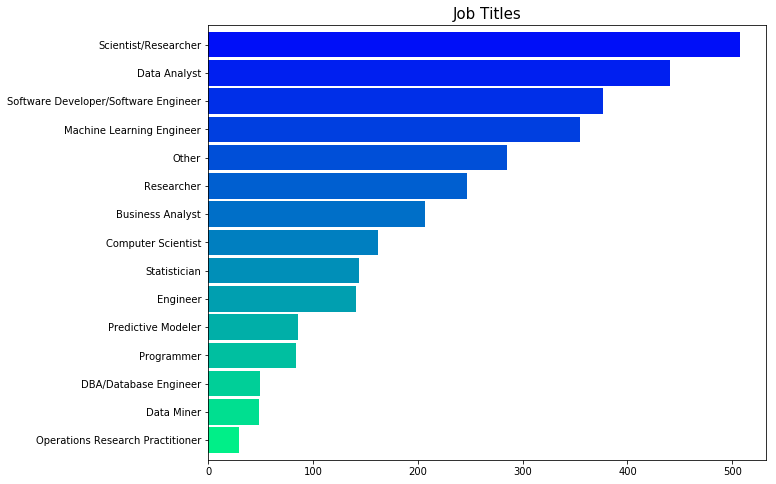

In [50]:
plt.subplots(figsize=(10,8))
scientist=response[response['DataScienceIdentitySelect']=='Yes']
#scientist['CurrentJobTitleSelect'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('RdYlGn_r',15))
scientist['CurrentJobTitleSelect'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15))
plt.title('Job Titles',size=15)
plt.show()


Surprisingly there is no entry for the Job Title Data Scientist. There reasons for this could be that the people with CurrentJobTitleSelect as Data Scientist(who might be working as Data Scientist) might have not answered the question: "Do you currently consider yourself a Data Scientist?"

There are many overlapping and common skills between the jobs like Data Analyst,Data Scientist and Machine Learning experts, Statisticians,etc. Thus they too have similar skills and consider themselves as Data Scientists even though they are not labeled the same. Now lets check if the previous assumption was True.

In [51]:
true=response[response['CurrentJobTitleSelect']=='Data Scientist']

In [52]:
true

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Male,India,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Male,Colombia,34.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Male,Germany,41.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Male,United Kingdom,36.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Male,United States,30.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,Male,Portugal,30.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Male,Other,28.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,Male,Mexico,26.0,Employed part-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Male,India,29.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It was indeed True. People with their CurrentJobTitle as Data Scientist did not answer the question "Do you currently consider yourself a Data Scientist?". So I am considering them also to be real Data Scientists.

In [53]:
scientist=pd.concat([scientist,true])
scientist['CurrentJobTitleSelect'].shape[0]

6690

So out of the total respondents, about 40% of them are Data Scientists or have skills for the same.

## Country-Wise Split

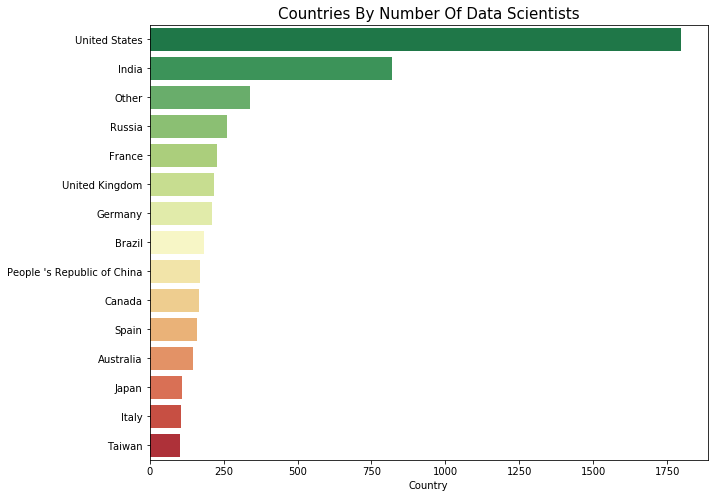

In [54]:
plt.subplots(figsize=(10,8))
coun=scientist['Country'].value_counts()[:15].sort_values(ascending=False).to_frame()
sns.barplot(coun.Country,coun.index,palette='RdYlGn_r')
plt.title('Countries By Number Of Data Scientists',size=15)
plt.show()

The graph is similar to the demographic graph where we had shown number of users by country. The difference is that the numbers have reduced as we have only considered Data Scientists.


## Employment Status & Education

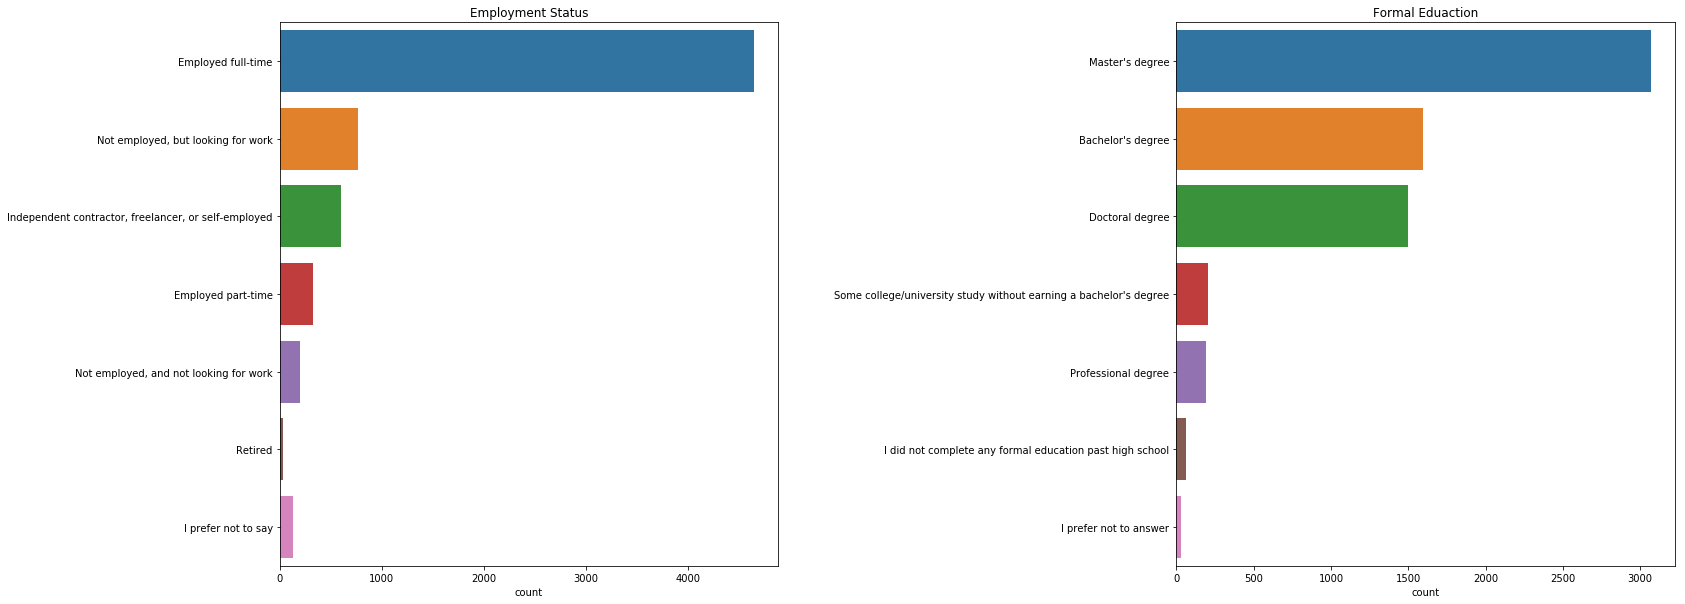

In [55]:
f,ax=plt.subplots(1,2,figsize=(25,10))
sns.countplot(y=scientist['EmploymentStatus'],ax=ax[0])
ax[0].set_title('Employment Status')
ax[0].set_ylabel('')
sns.countplot(y=scientist['FormalEducation'],order=scientist['FormalEducation'].value_counts().index,ax=ax[1])
ax[1].set_title('Formal Eduaction')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

About 67% of the data scientists are employed full-time, while about 11-12% of them are unemployed but looking for job. On the education side it is evident that about 45-46% of the data scientists hold a master's degree, while about 23-24% of them have a bachelor's degree or a doctoral degree. Thus education seems to be an important factor for becoming a data scientist. Let's see how does the salary vary according to the education.

## Compensation By Formal Education

In [56]:
print(scientist.shape,salary.shape)

(6690, 228) (4351, 8)


(6690, 236)


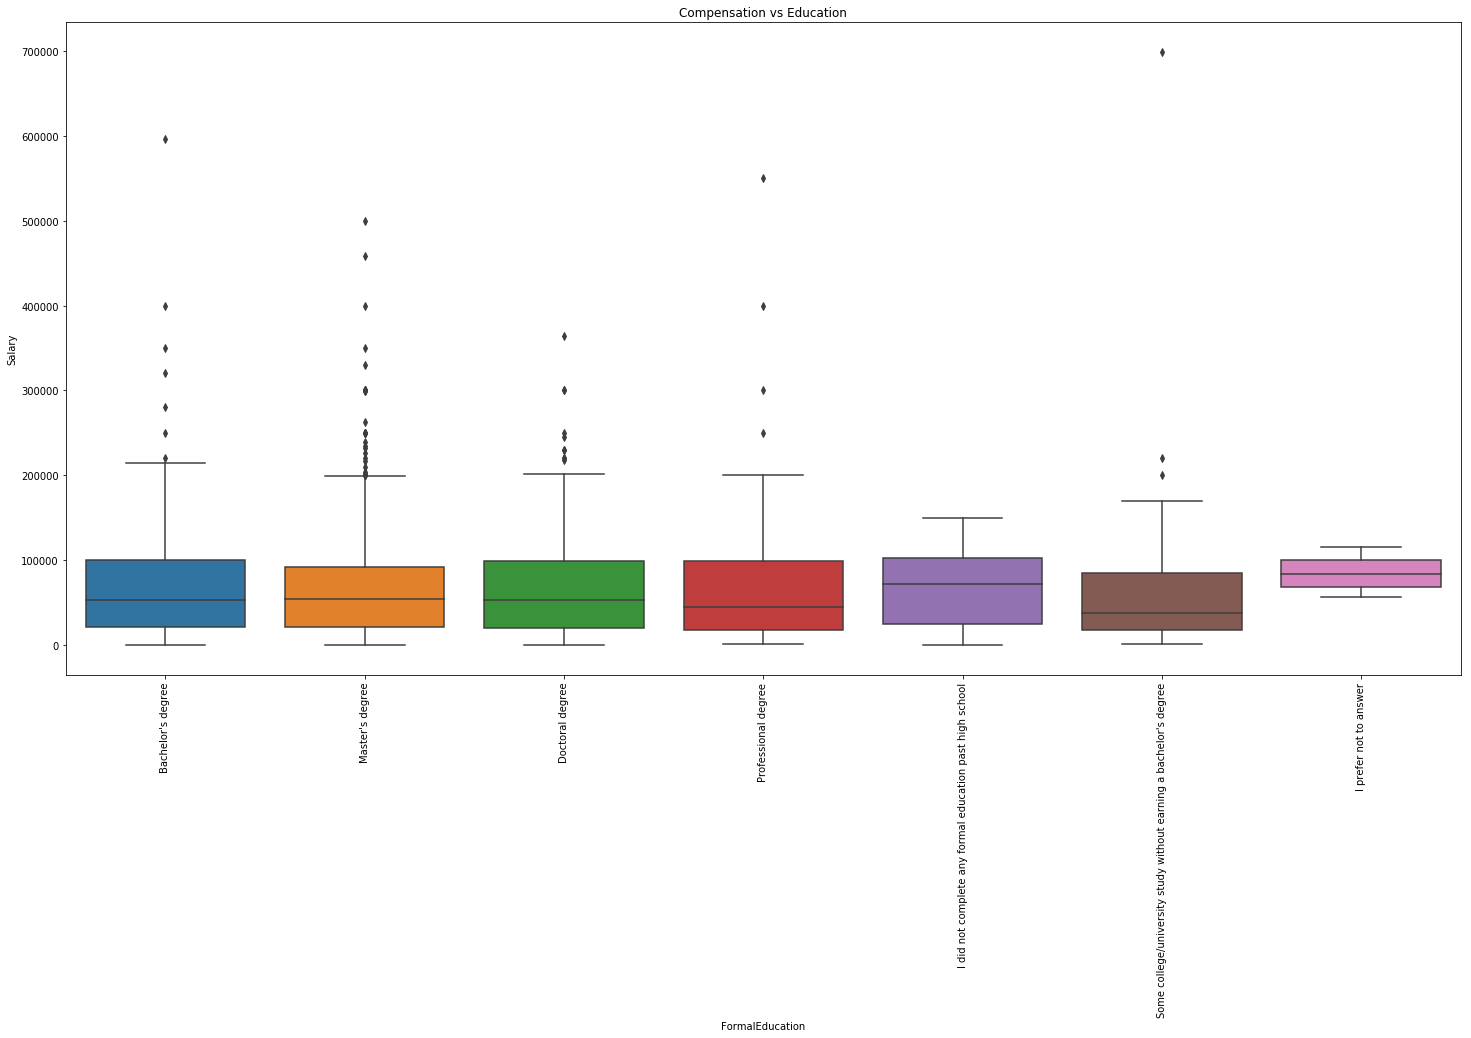

In [57]:
plt.subplots(figsize=(25,12))
comp_edu=scientist.merge(salary,left_index=True,right_index=True,how='left')
print(comp_edu.shape)
comp_edu=comp_edu[['FormalEducation','Salary']]
sns.boxplot(x='FormalEducation',y='Salary',data=comp_edu)
plt.title('Compensation vs Education')
plt.xticks(rotation=90)
plt.show()

This is surprising as the salary ranges for Bachelor's, Master's and Doctoral degree look to very similar. The median for Bachelor's degree seems to be a bit high as compared to Master's and doctoral degree. I didn't expect this as many of the Data Scientists hold a masters degree. But I think Work Experience matters more than any degree. Maybe the Bachelor's degree holders have more experience as compared than the other two.

## Previous Job and Salary Change

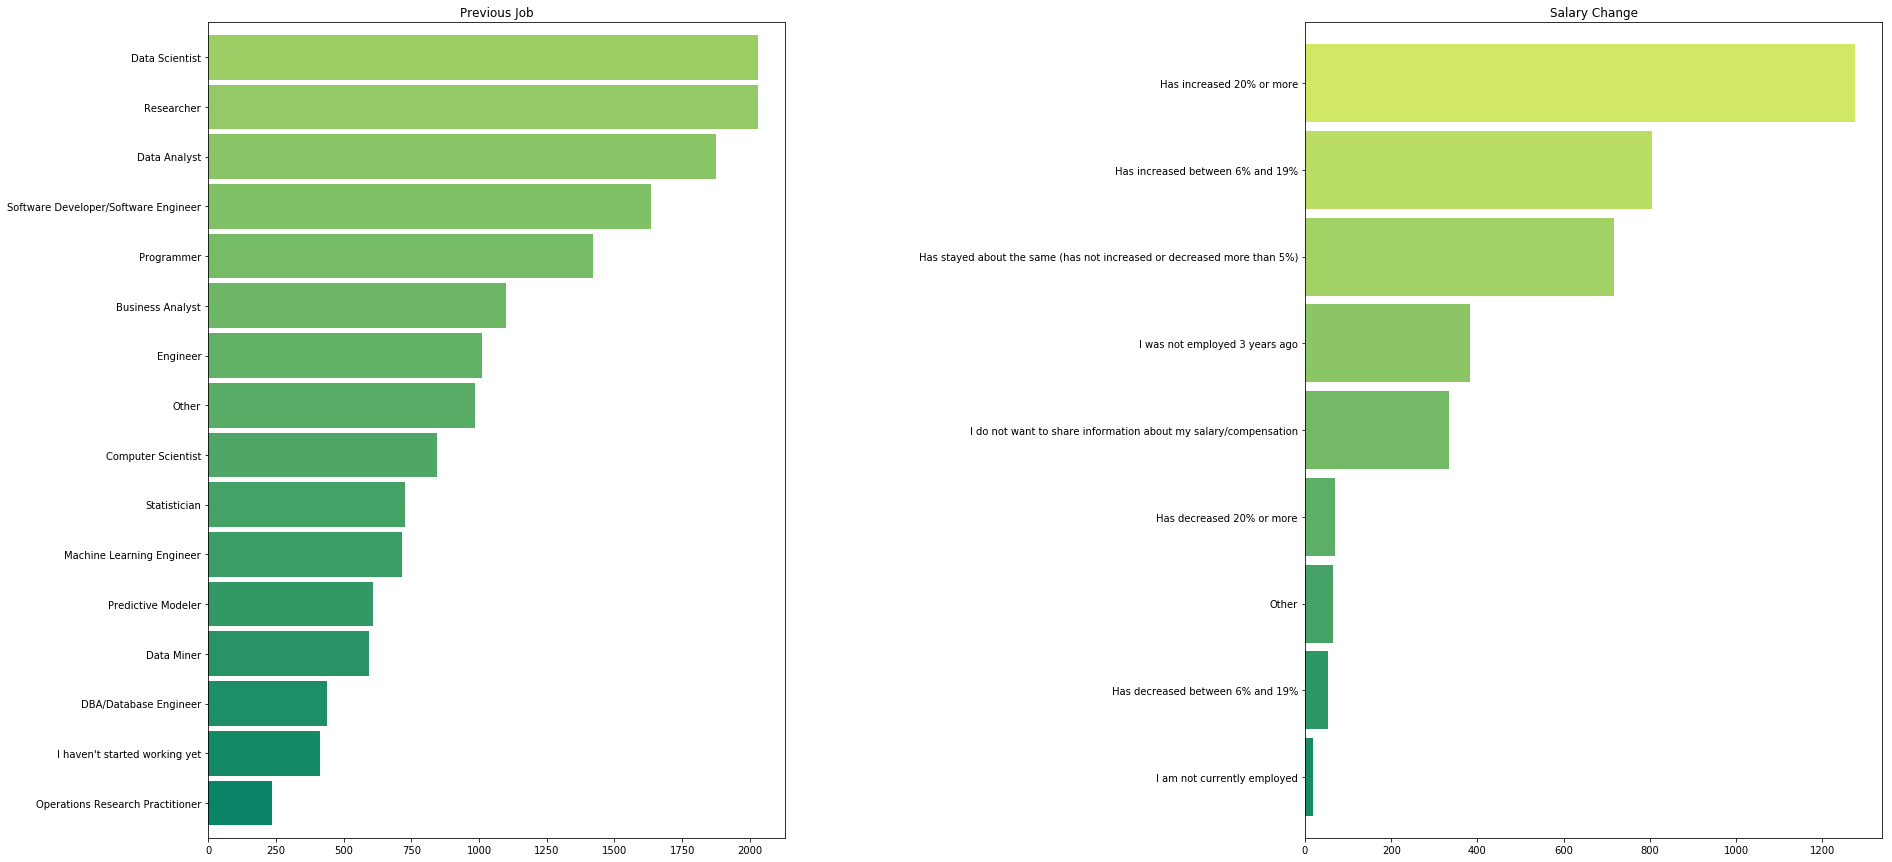

In [58]:
f,ax=plt.subplots(1,2,figsize=(30,15))
past=scientist['PastJobTitlesSelect'].str.split(',')
past_job=[]
for i in past.dropna():
    past_job.extend(i)
pd.Series(past_job).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer',25),ax=ax[0])
ax[0].set_title('Previous Job')
sal=scientist['SalaryChange'].str.split(',')
sal_change=[]
for i in sal.dropna():
    sal_change.extend(i)
pd.Series(sal_change).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer',10),ax=ax[1])
ax[1].set_title('Salary Change')
plt.subplots_adjust(wspace=0.9)
plt.show()

Clearly majority of people switching to Data Science get a salary hike about 6-20% or more. With this increasing demand for Data Scientists, the salary may also increase with time.

## Tools used at Work

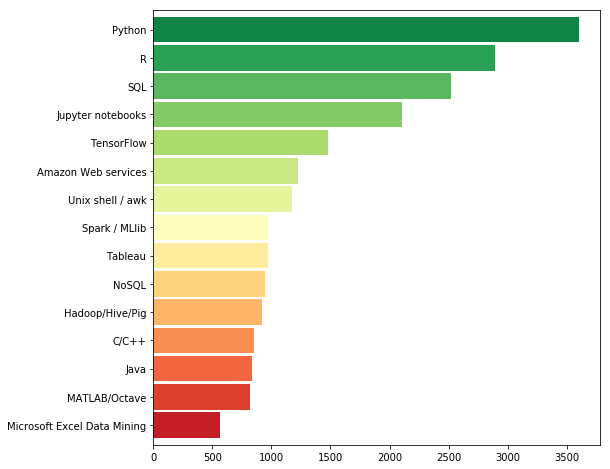

In [59]:
plt.subplots(figsize=(8,8))
tools=scientist['WorkToolsSelect'].str.split(',')
tools_work=[]
for i in tools.dropna():
    tools_work.extend(i)
pd.Series(tools_work).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('RdYlGn',15))
plt.show()

Similar observations, Python, R and SQL are the most used tools or languages in Data Science

## Where Did they Learn From?

In [60]:
course=scientist['CoursePlatformSelect'].str.split(',')
course_plat=[]
for i in course.dropna():
    course_plat.extend(i)
course_plat=pd.Series(course_plat).value_counts()
blogs=scientist['BlogsPodcastsNewslettersSelect'].str.split(',')
blogs_fam=[]
for i in blogs.dropna():
    blogs_fam.extend(i)
blogs_fam=pd.Series(blogs_fam).value_counts()

labels1=course_plat.index
sizes1=course_plat.values

labels2=blogs_fam[:5].index
sizes2=blogs_fam[:5].values

fig = {
  "data": [
    {
      "values": sizes1,
      "labels": labels1,
      "domain": {"x": [0, .48]},
      "name": "MOOC",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": sizes2 ,
      "labels": labels2,
      "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Blog",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Blogs and Online Platforms",
        "showlegend":True,
        "annotations": [
            {
                "font": {
                    "size": 12
                },
                "showarrow": False,
                "text": "MOOC's",
                "x": 0.18,
                "y": 0.5
            },
            {
                "font": {
                    "size": 12
                },
                "showarrow": False,
                "text": "BLOGS",
                "x": 0.83,
                "y": 0.5}]}}
py.iplot(fig, filename='donut')

Coursera is the most favoured platform by Data Scientists for learning Data Science. My personal vote also goes for Coursera, where you can learn things from scratch to advanced on the same platform. It is not limited to a single language like Python or R, but also has courses covering other languages like Scala,etc. Similarly KDNuggets is the most preferred blog.

## Time Spent on Tasks

A Data Scientist is not always building predictive models, he is also responsible for the data quality, gathering the right data, analytics,etc. Lets see how much time a data scientist spends on these differnt tasks.

TimeFindingInsights 0
TimeVisualizing 1
TimeGatheringData 2
TimeModelBuilding 3


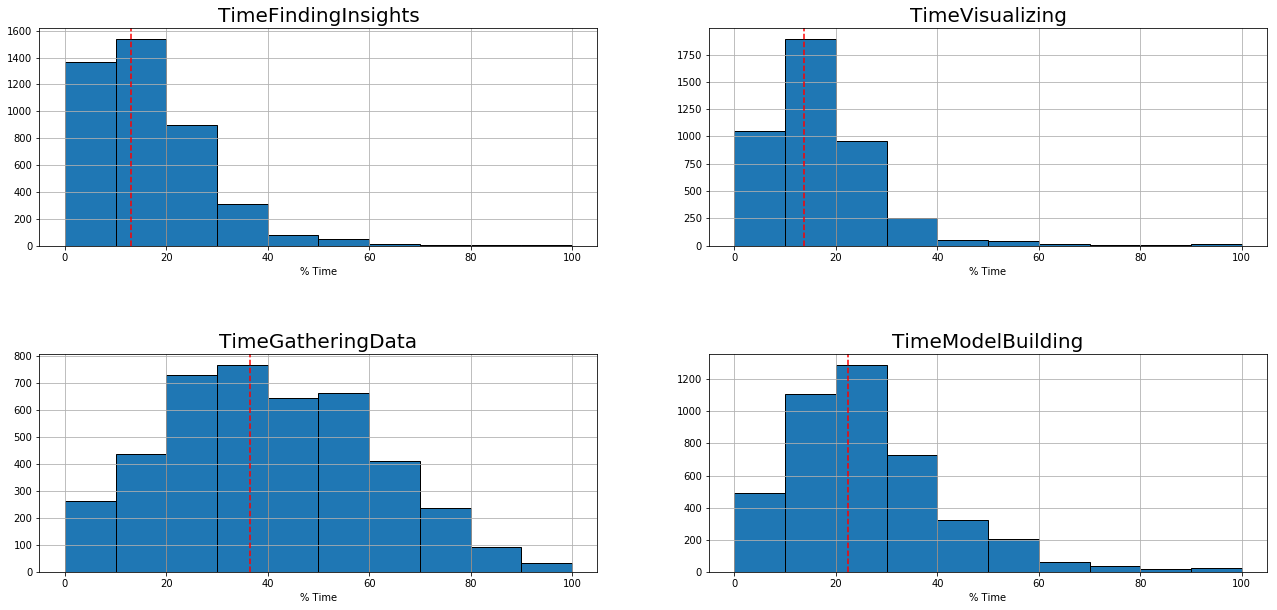

In [61]:
import itertools
plt.subplots(figsize=(22,10))
time_spent=['TimeFindingInsights','TimeVisualizing','TimeGatheringData','TimeModelBuilding']
length=len(time_spent)
for i,j in itertools.zip_longest(time_spent, range(length)):
    print(i,j)
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    scientist[i].hist(bins=10,edgecolor='black')
    plt.axvline(scientist[i].mean(),linestyle='dashed',color='r')
    plt.title(i,size=20)
    plt.xlabel('% Time')
plt.show()

The read line is the mean line. Lets do it stepwise:

- **TimeGatheringData:** It is undoubtedly the most time consuming part. Getting the data is the most painstaking task in the entire process, which is followed by Data Cleaning(not shown as data not available) which is yet other time consuming process. Thus gathering right data and scrubing the data are the most time consuming process.

- **TimeVisualizing:** It is probably the least time consuming process(and probably the most enjoyable one..:p), and it reduces even further if we use Enterprise Tools like Tableau,Qlik,Tibco,etc, which helps in building graphs and dashboards with simple drag and drop features.

- **TimeFindingInsights:** It is followed after visualising the data, which involves finding facts and patterns in the data, slicing and dicing it to find insights for business processes.It looks to a bit more time consuming as compared to TimeVisualizing.

- **TimeModelBuilding:** It is where the data scientists build predictive models, tune these models,etc. It is the 2nd most time consuming process after TimeDataGathering.

## Cloud Services

With the increasing size of the data, it is not possible to process the data and perform predictive analytics on the physical server infrastructures. Cloud thus takes predictive analytics to a next level, with scalabilty its main advantage. They manage service that enables you to easily build machine learning models that work on any type of data, of any size. Lets check what are the most used cloud platforms by Data Scientists

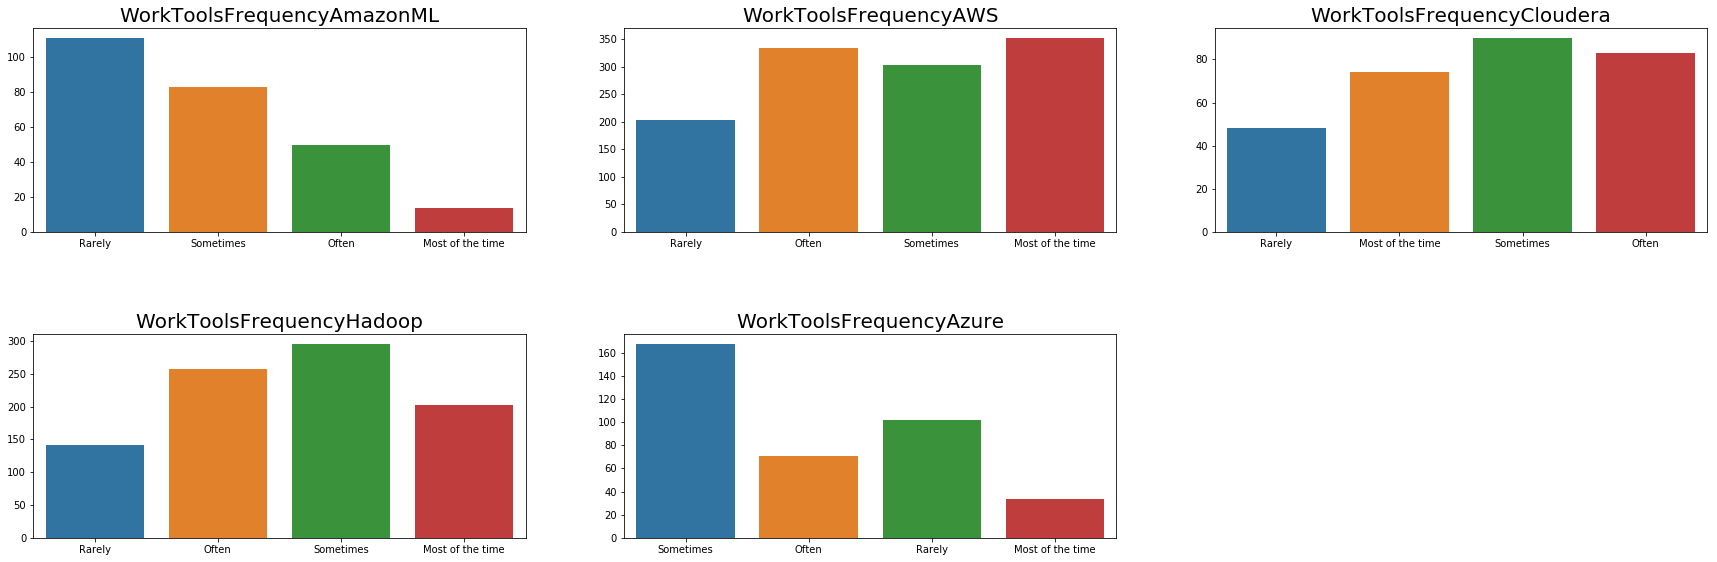

In [62]:
cloud=['WorkToolsFrequencyAmazonML','WorkToolsFrequencyAWS','WorkToolsFrequencyCloudera','WorkToolsFrequencyHadoop','WorkToolsFrequencyAzure']
plt.subplots(figsize=(30,15))
length=len(cloud)
for i,j in itertools.zip_longest(cloud,range(length)):
    plt.subplot((length/2+1),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(i,data=scientist)
    plt.title(i,size=20)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

It is evident that AmazonAWS, which is a public cloud service provider is the most used cloud platform, followed by Hadoop. Hadoop is an open-source software framework used for distributed storage and processing of dataset of big data. For reading more about Hadoop, Check this

## Importance Of Visualisations

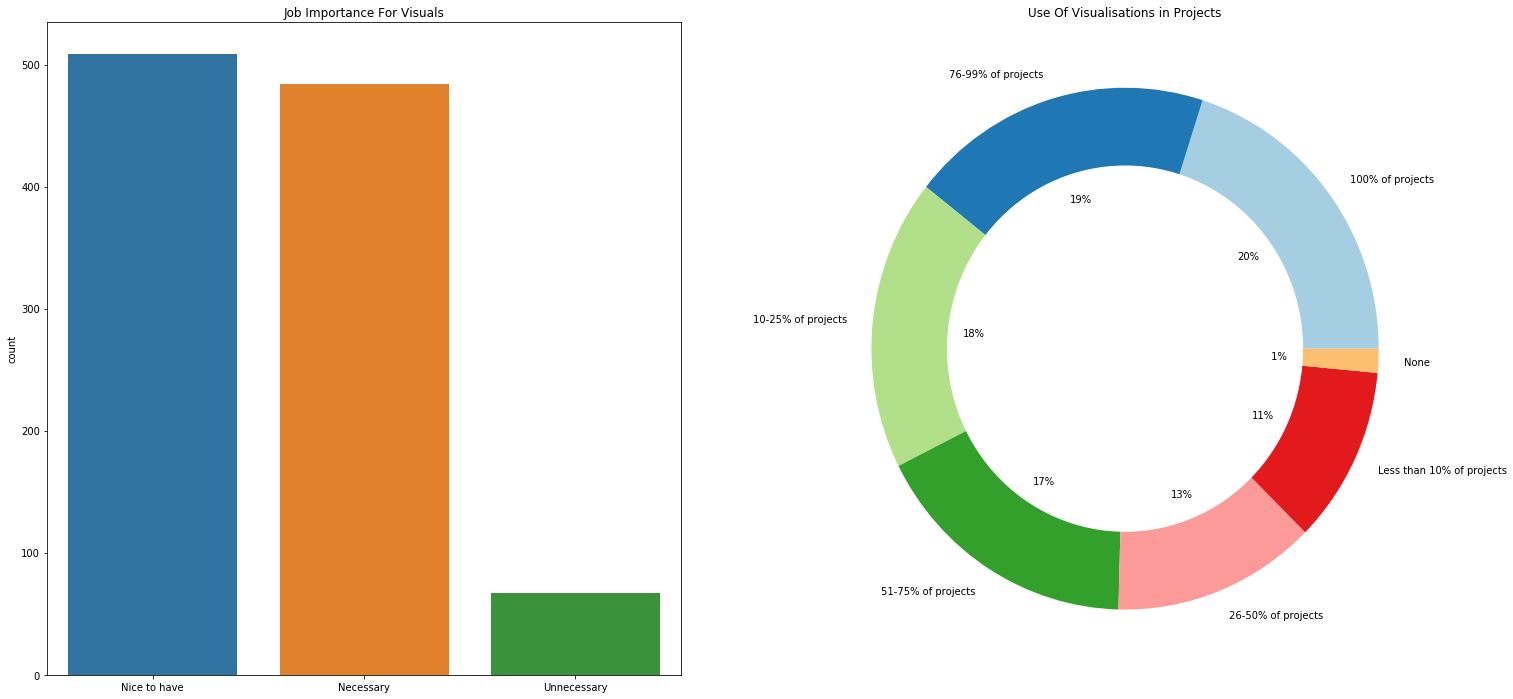

In [63]:
f,ax=plt.subplots(1,2,figsize=(25,12))
sns.countplot(scientist['JobSkillImportanceVisualizations'],ax=ax[0])
ax[0].set_title('Job Importance For Visuals')
ax[0].set_xlabel('')
scientist['WorkDataVisualizations'].value_counts().plot.pie(autopct='%2.0f%%',colors=sns.color_palette('Paired',10),ax=ax[1])
ax[1].set_title('Use Of Visualisations in Projects')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

Visualisations are a very integral part of Data Science Projects, and the above graph also shows the same. Almost all data science projects i.e 99% of the projects have visualisations in them, doesn't matter how big or small. About 95% of Data Scientists say that Visualisations skills are nice to have or necessary.Visuals help to understand and comprehend the data faster not only to the professionals but also to target customers, who may not be technically skilled.

## BI Tools

Business intelligence software is a type of application software designed to retrieve, analyze, transform and report data for business intelligence. They make data visualisation and analytics very simple as compared to normal coding way in Python or R. The only drawback is that they are proprietory and costly. Lets check which are the most frequently used enterprise BI tools used by Data Scientists.

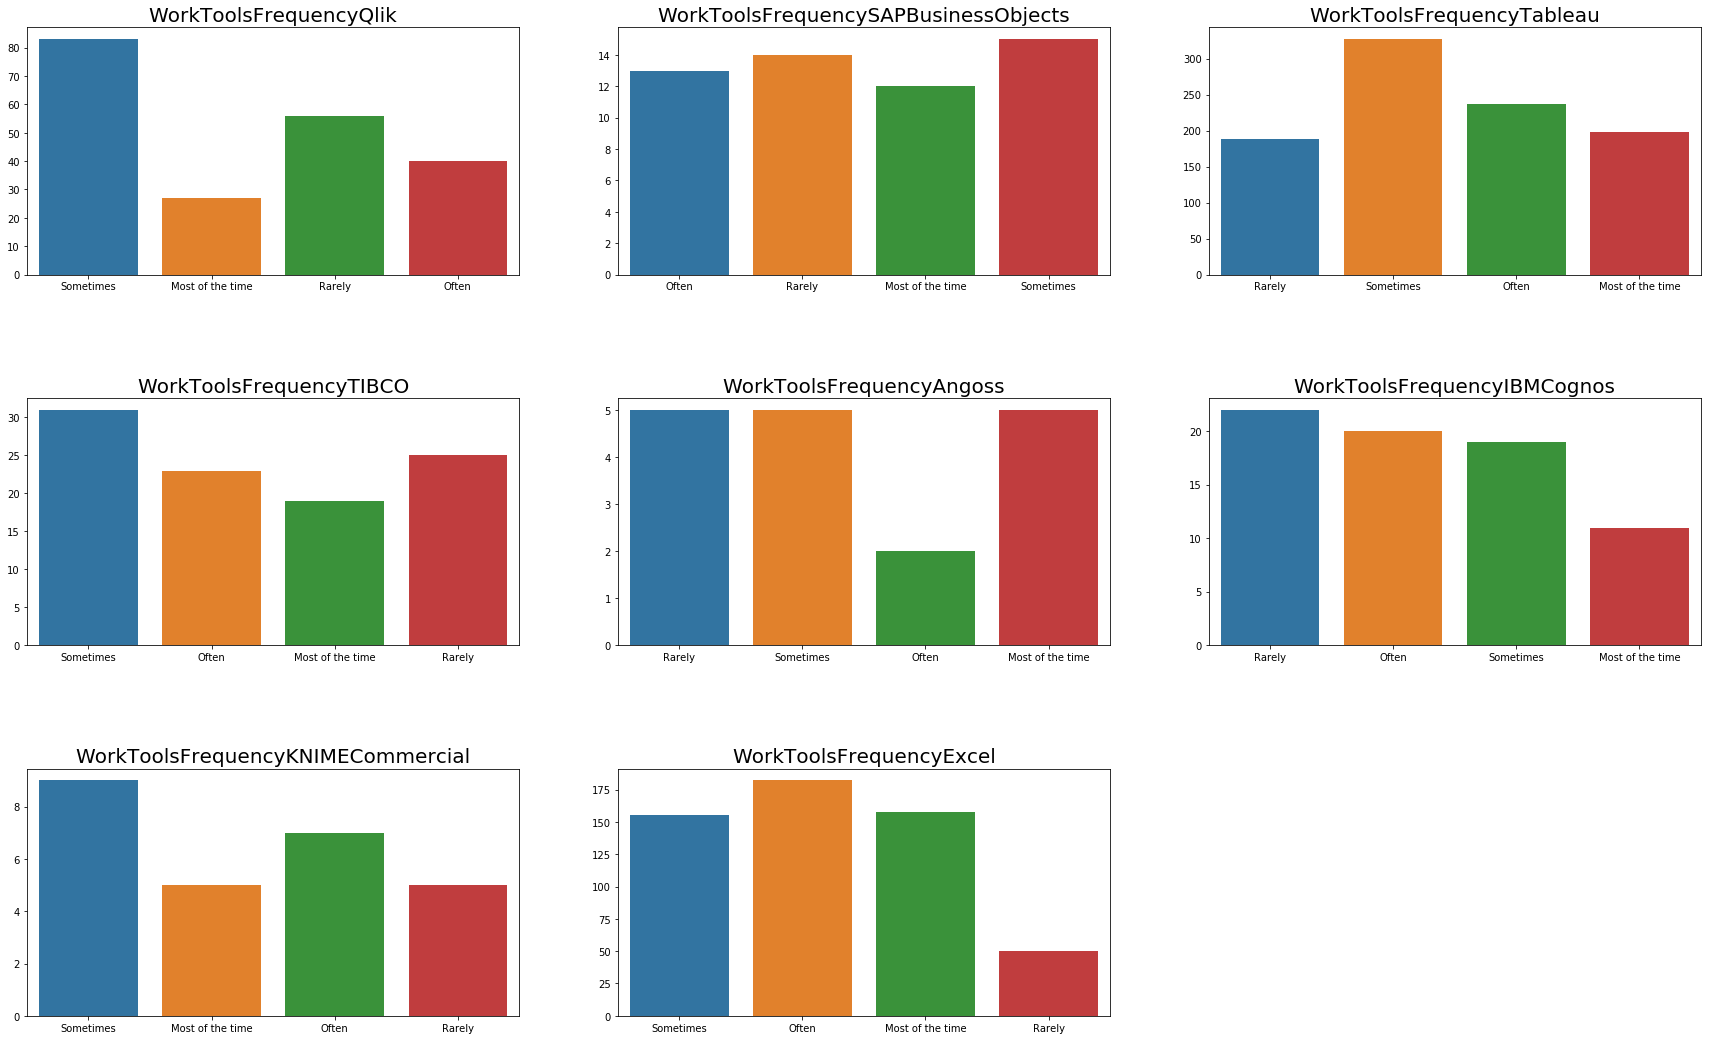

In [64]:
BI=['WorkToolsFrequencyQlik','WorkToolsFrequencySAPBusinessObjects','WorkToolsFrequencyTableau','WorkToolsFrequencyTIBCO','WorkToolsFrequencyAngoss','WorkToolsFrequencyIBMCognos','WorkToolsFrequencyKNIMECommercial','WorkToolsFrequencyExcel']
plt.subplots(figsize=(30,25))
length=len(BI)
for i,j in itertools.zip_longest(BI,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(i,data=scientist)
    plt.title(i,size=20)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

I had read or heard somewhere that Excel is the bread and butter for analysts. This thing still somewhat holds true, as Excel is still popular among Data Scientists. However, the most frequently used BI tool looks to be Tableau. I personally use Tableau and it is pretty user friendly, drag and drop and you have your graphs ready.

## Knowledge Of Algorithms (Maths and Stats)

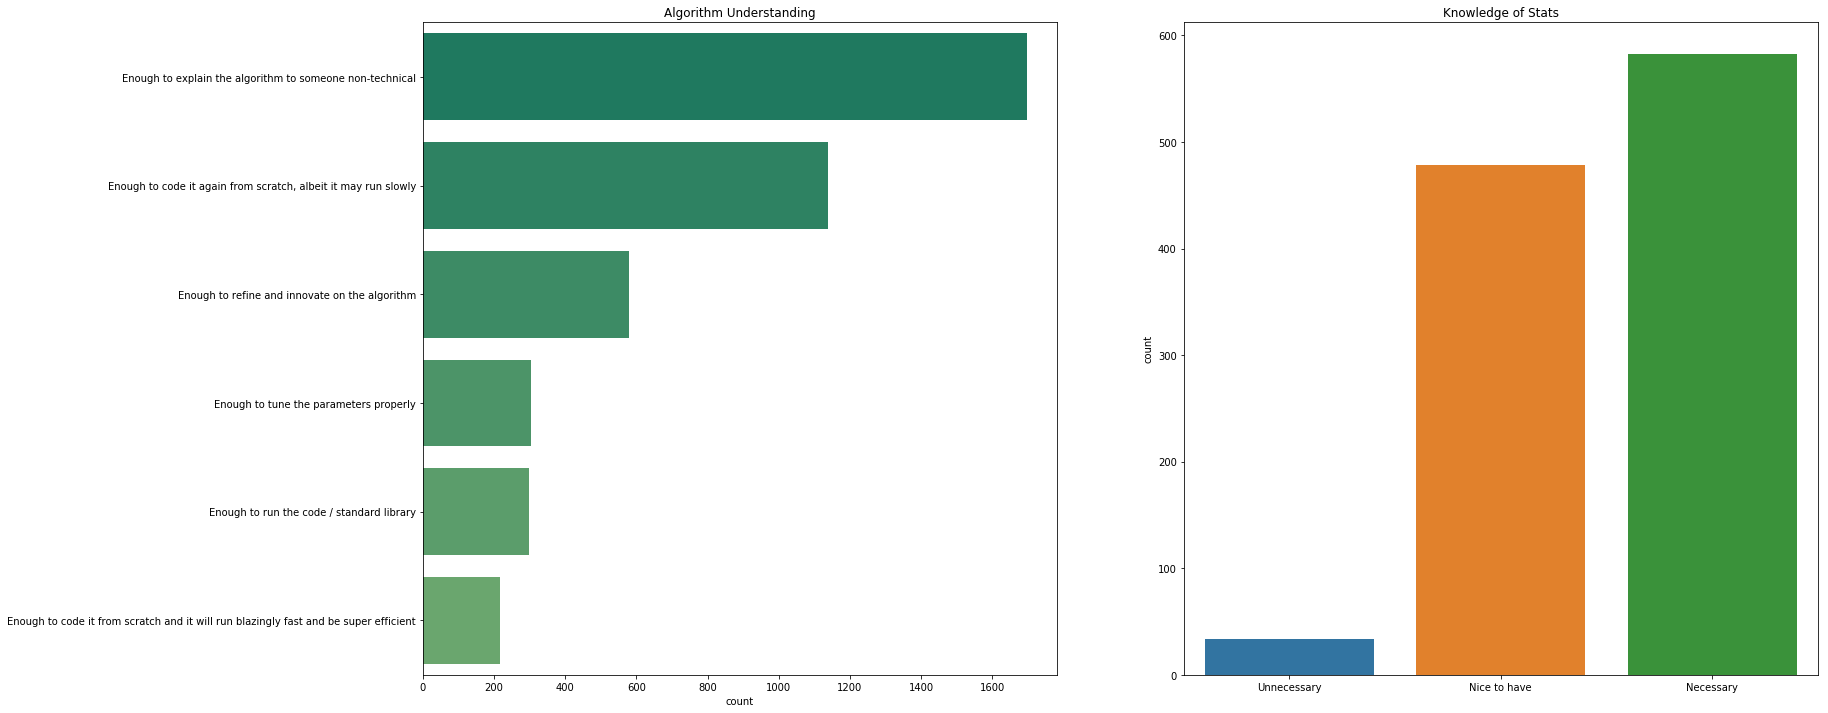

In [65]:
f,ax=plt.subplots(1,2,figsize=(25,12))
sns.countplot(y=scientist['AlgorithmUnderstandingLevel'],order=scientist['AlgorithmUnderstandingLevel'].value_counts().index,ax=ax[0],palette=sns.color_palette('summer',15))
sns.countplot(scientist['JobSkillImportanceStats'],ax=ax[1])
ax[0].set_title('Algorithm Understanding')
ax[0].set_ylabel('')
ax[1].set_title('Knowledge of Stats')
ax[1].set_xlabel('')
plt.show()

In [66]:
#scientist['AlgorithmUnderstandingLevel'].value_counts()
#scientist['JobSkillImportanceStats'].value_counts()

Data Scientists have a good knowledge of mathematical concepts like Statistics and Linear Algebra, which are the most important part of Machine Learning algorithms. But is this maths really required, as many standard libraries like scikit,tensorflow,keras etc have all these things already implemented. But the experienced data scientists say that we should have a good understanding of the maths behind the algorithms. About 95% of the data scientists say the stats is an important asset in Data Science.

## Learning Platform Usefullness

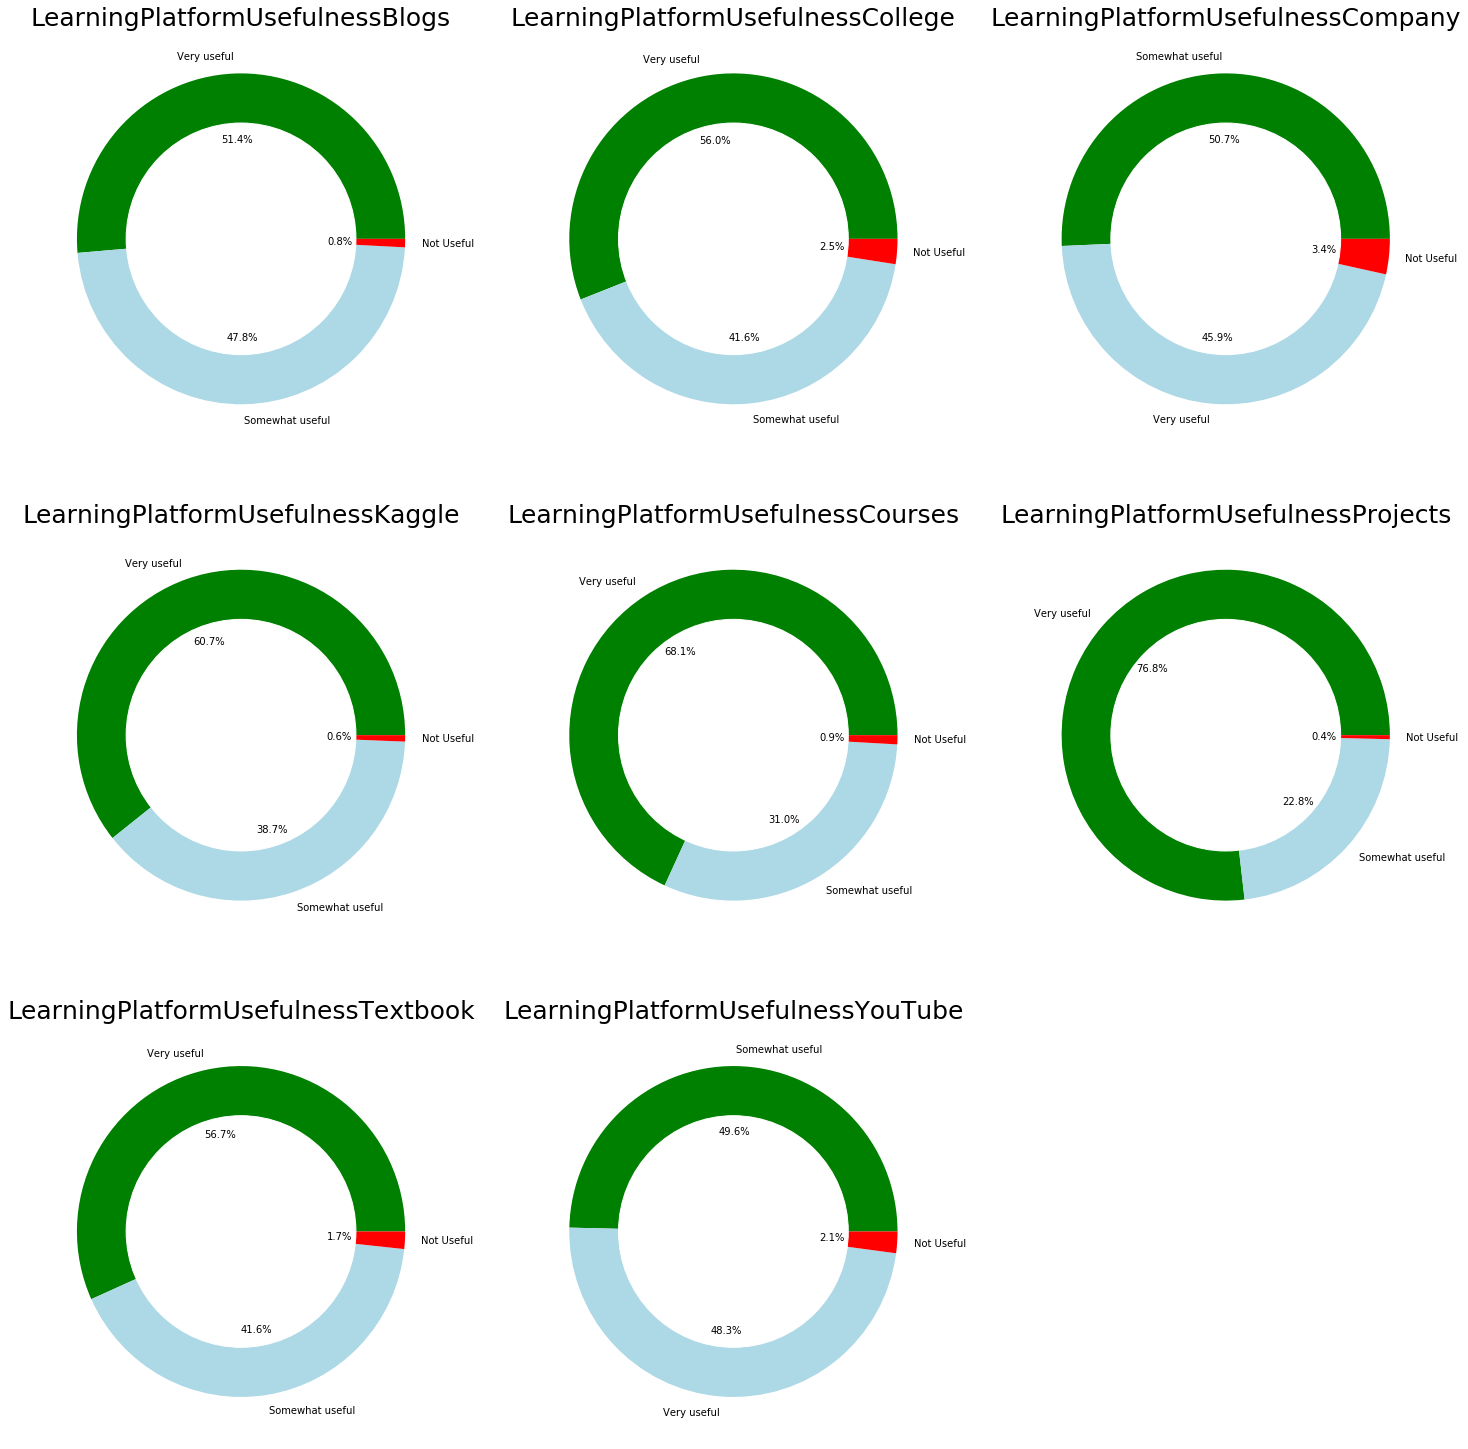

In [67]:
plt.subplots(figsize=(25,35))
useful=['LearningPlatformUsefulnessBlogs','LearningPlatformUsefulnessCollege','LearningPlatformUsefulnessCompany','LearningPlatformUsefulnessKaggle','LearningPlatformUsefulnessCourses','LearningPlatformUsefulnessProjects','LearningPlatformUsefulnessTextbook','LearningPlatformUsefulnessYouTube']
length=len(useful)
for i,j in itertools.zip_longest(useful,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
#    scientist[i].value_counts().plot.pie(autopct='%1.1f%%',colors=['g','lightblue','r'],wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
    scientist[i].value_counts().plot.pie(autopct='%1.1f%%',colors=['g','lightblue','r'])
    plt.title(i,size=25)
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

The above donut charts shows the opinion of Data Scientists about the various platforms to learn Data Science. The plot looks best for Projects,where the percentage for not useful is almost 0%.According to my personal opinion too, projects are the best platform or way for learning anything in the IT industry. The other excellent platforms are Online Courses and Kaggle. The graphs for other platforms are quite similar to each other.

## What should the Resume have?

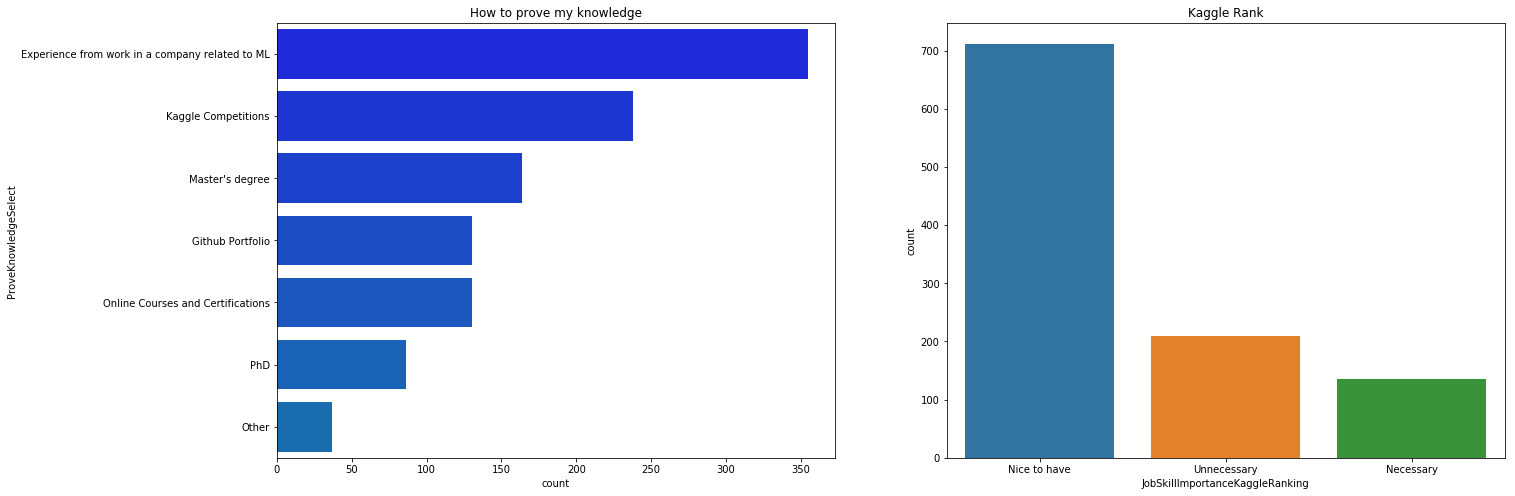

In [68]:
f,ax=plt.subplots(1,2,figsize=(22,8))
sns.countplot(y=scientist['ProveKnowledgeSelect'],order=scientist['ProveKnowledgeSelect'].value_counts().index,ax=ax[0],palette=sns.color_palette('winter',15))
ax[0].set_title('How to prove my knowledge')
sns.countplot(scientist['JobSkillImportanceKaggleRanking'],ax=ax[1])
ax[1].set_title('Kaggle Rank')
plt.show()


It is evident that Work experience in ML projects and Kaggle competitions reflects the knowledge of Data Science. Also a kaggle rank can be a good thing in one's resume. As I had mentioned earlier that relevant work experience might have a higher value as compared to any Master's or Doctoral degree. This statement thus holds good, as Data Scientists prefer work experience over degree, as seen in the above graph

## How did they search for Jobs?

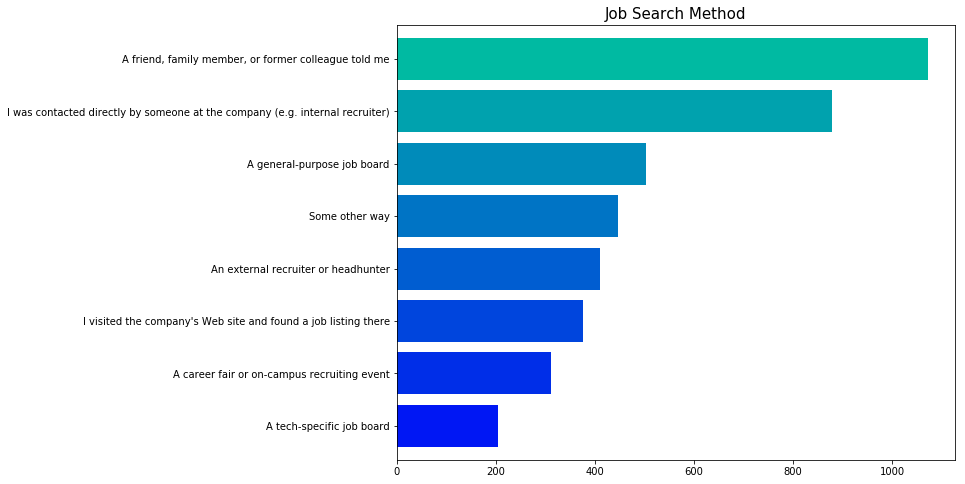

In [69]:
plt.subplots(figsize=(10,8))
scientist.groupby(['EmployerSearchMethod'])['Age'].count().sort_values(ascending=True).plot.barh(width=0.8,color=sns.color_palette('winter',10))
plt.title('Job Search Method',size=15)
plt.ylabel('')
plt.show()

In [70]:
scientist.groupby(['EmployerSearchMethod'])['Age'].count().sort_values(ascending=False).to_frame()

,Age
EmployerSearchMethod,
"A friend, family member, or former colleague told me",1073
I was contacted directly by someone at the company (e.g. internal recruiter),879
A general-purpose job board,503
Some other way,446
An external recruiter or headhunter,411
I visited the company's Web site and found a job listing there,376
A career fair or on-campus recruiting event,311
A tech-specific job board,204


Many Data Scientists get to know about the jobs through their friends or relatives or they were contacted by directly by the company. Thus we should properly maintain our professional profiles like Linkedin and keep on updating it, as such networking sites could help you get your dream job.

## Checking the Free Responses

This file contains the free form responses answered by the respondents. The problem with this one is that being a free form response, every user will answer in their own way. What I mean is we will have different answers for the same thing. An example of this that I observed is the library Pandas is written as pandas, Pandas, panda and in many such differnt forms. Thus I will try to analyse this file using nltk(Natural Language Toolkit).

## Motivation Behind Working on Kaggle

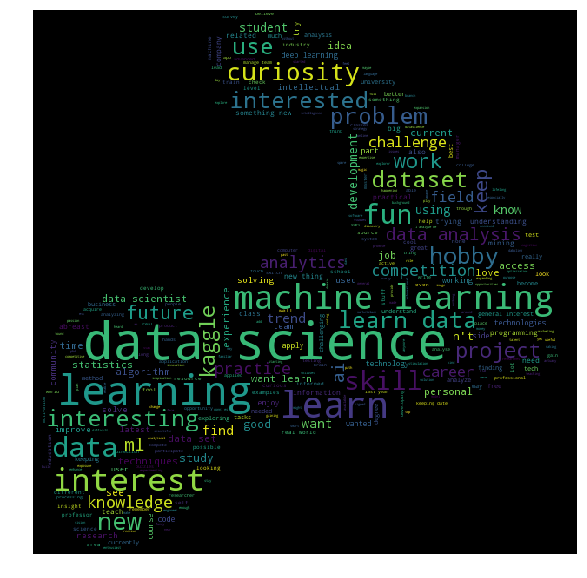

In [71]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
free=pd.read_csv('dat/freeformResponses.csv')
stop_words=set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...')

motivation=free['KaggleMotivationFreeForm'].dropna().apply(nltk.word_tokenize)
motivate=[]
for i in motivation:
    motivate.extend(i)
motivate=pd.Series(motivate)
motivate=([i for i in motivate.str.lower() if i not in stop_words])
#f1=open("kaggle.png", "wb")
#f1.write(codecs.decode(kaggle,'base64'))
#f1.close()
img1 = imread("kaggle.png")
hcmask1 = img1
wc = WordCloud(background_color="black", max_words=4000, mask=hcmask1, 
               stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(motivate))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## Lets flex our data science strength...:p

The wordcloud shows the motivation of users for working on kaggle. Clearly Learning Data Science, Machine Learning, interest in the same,curiosity, fun and datasets retrieval are some of the relevant ones.

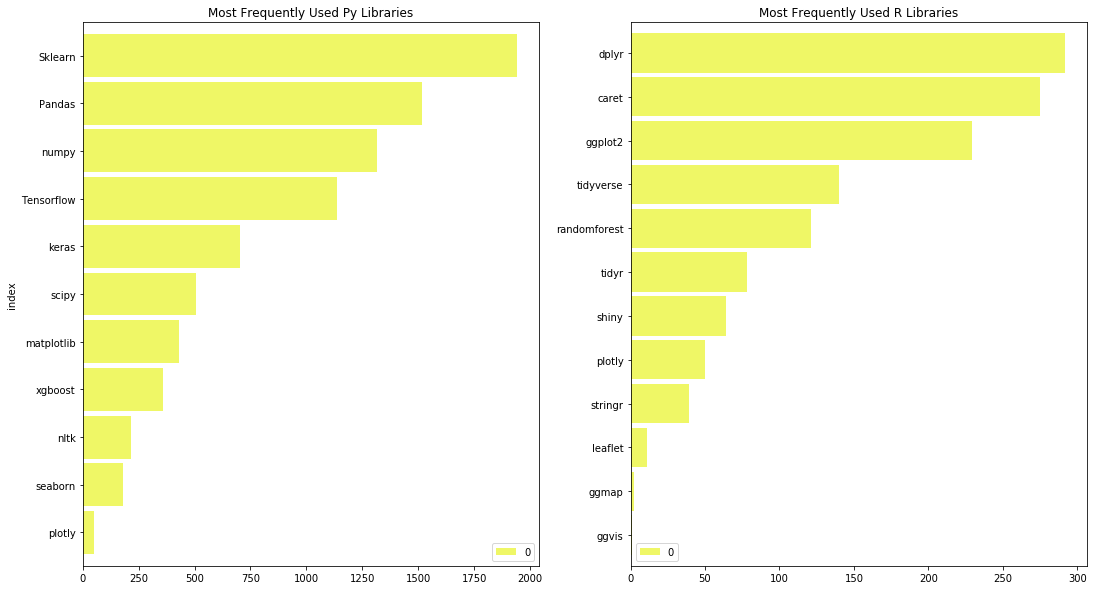

In [72]:
library=free['WorkLibrariesFreeForm'].dropna().apply(nltk.word_tokenize)
#library
lib=[]
for i in library:
    lib.extend(i)
lib=pd.Series(lib)
lib=([i for i in lib.str.lower() if i not in stop_words])
lib=pd.Series(lib)
lib=lib.value_counts().reset_index()
lib.loc[lib['index'].str.contains('Pandas|pandas|panda'),'index']='Pandas'
lib.loc[lib['index'].str.contains('Tensorflow|tensorflow|tf|tensor'),'index']='Tensorflow'
lib.loc[lib['index'].str.contains('Scikit|scikit|sklearn'),'index']='Sklearn'
lib=lib.groupby('index')[0].sum().sort_values(ascending=False).to_frame()
R_packages=['dplyr','tidyr','ggplot2','caret','randomforest','shiny','R markdown','ggmap','leaflet','ggvis','stringr','tidyverse','plotly']
Py_packages=['Pandas','Tensorflow','Sklearn','matplotlib','numpy','scipy','seaborn','keras','xgboost','nltk','plotly']
f,ax=plt.subplots(1,2,figsize=(18,10))
lib[lib.index.isin(Py_packages)].sort_values(by=0,ascending=True).plot.barh(ax=ax[0],width=0.9,color=sns.color_palette('summer_r',15))
ax[0].set_title('Most Frequently Used Py Libraries')
lib[lib.index.isin(R_packages)].sort_values(by=0,ascending=True).plot.barh(ax=ax[1],width=0.9,color=sns.color_palette('summer_r',15))
ax[1].set_title('Most Frequently Used R Libraries')
ax[1].set_ylabel('')
plt.show()

## Some brief information about the libraries:

Python:
1) Sklearn- For Machine Learning algorithms. This library has almost all the important machine learning algorithms used for industries.

2) Pandas, Matlotlib & Seaborn- Mostly used together for analytics and visualisation work.

3) TensorFlow and Keras- Used for Deep Learning.

4) Numpy and Scipy- Used for scientific computations.

5) nltk- Used for Natural Language Processing.

R:
1) dplyr- dplyr is the package for fast data manipulation.

2) ggplot2 and shiny- R's famous package for making beautiful graphics. Python visuals are nowhere near to the quality of visuals created using this library.

3) caret and randomforest- For Machine Learning purpose.

4) tidyr- Tools for changing the layout of your data sets.

5) stringr- Easy to learn tools for regular expressions and character strings.

Leaflet (folium in Python) and Plotly are common libraries in both languages, and are used to create interactive plots like geomaps, etc.

Conclusions
Some brief insights that we gathered from the notebook:

1) Majority of the respondents are from USA followed by India. USA also had the maximum number of data scientists followed by India. Also the median Salary is highest in USA.

2) Majority of the respondents are in the age bracket 20-35, which shows that data science is quite famous in the youngsters.

3) The respondents are not just limited to Computer Science major, but also from majors like Statistics, health sciences,etc showing that Data Science is an interdisciplinary domain.

4) Majority of the respondents are fully employed.

5) Kaggle, Online Courses(Coursera,eDx,etc), Projects and Blogs(KDNuggets,AnalyticsVidya,etc) are the top resources/platforms for learning Data Science.

6) Kaggle has the highest share for data acquisition whereas Github has the highest share for code sharing.

7) Data Scientists have the highest Job Satisfaction level and the second highest median salary (after Operations Research Analyst). On the contrary, Programmers have the least Job Satisfaction level and one of the least median salary also.

8) Data Scientists also get a hike of about 6-20% from their previous jobs.

Tips For Budding Data Scientists
1) Learn Python,R and SQL as they are the most used languages by the Data Scientists. Python and R will help in analytics and predictive modeling while SQL is best for querying the databases.

2) Learn Machine Learning Techniques like Logistic Regression, Decision Trees, Support Vector Machines, etc as they are most commonly used Machine Learning techniques/algorithms.

3) Deep Learning and Neural Nets will be the most sought after techniques in the future, thus a good knowledge in them will be very helpful.

4) Develop skills for Gathering Data and Cleaning The Data as they are the most time consuming processes in the workflow of a data scientist.

5) Visualisations are very important in Data Science projects and almost all projects require Visualisations for understanding the data better. So one should learn Data Visualisation as Data Scientists consider it to be a necessary or nice to have skill.

6) Maths and Stats are very important in Data Science, so we should have good understanding of it for actually understanding how the algorithm works.

7) Projects are the best way to learn Data Science according to Data Scientists.So working on projects will help you learn data science better.

8) Experience with ML Projects in company and Kaggle Competitions are the best ways to show your working knowledge in Data Science. Working on ML projects in a company gives the experience of working with real world datasets, thereby enhancing the knowledge. Kaggle competitions are also a great medium, as you will be competing with Data Scientists over the world. Also a Kaggle Rank can be a good USP in the resume.

So I would like my conclude my analysis here. Thanks a lot for having a look at this notebook.

I Hope all you liked the notebook. Any suggestions and feedback are always welcome.

Please Upvote this notebook as it encourages me in doing better.